In [1]:
from dotenv import load_dotenv
import os
import wandb
import tarfile
import os
import shutil

import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from itertools import cycle

from tqdm.notebook import tqdm

from collections import namedtuple

In [22]:
# Load .env file
load_dotenv()

# Access the API key
# api_key = os.getenv("WANDB_API_KEY")
api_key = "4140c08ae9644450d5f09dbdff386b71e689b04c"
wandb.login(key=api_key)

api = wandb.Api()

entity = "j4b"        # Your WandB username or team name
project = "rl-battery-management" # Your WandB project name
run_id = "9et6b3zy" # 7a9k98t4 "f8l4u7x4" # "waj0fjc3"  9et6b3zy  prhn0gl1     # ID of the specific run 

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\zm0714\_netrc


In [23]:
# 20cs no_charge_in_breaks: 5ci1627k
# 4cs: smng8nfs
# 20cs charge_in_breaks (eval only): 5qdjkxob
# 20cs charge_in_breaks (train): q7y9vy3q
# Specify your project and run ID
# tpt: [0, 2, 4,..., 12] ept: 10: 2qemex9x

# Retrieve the run object
run = api.run(f"{entity}/{project}/runs/{run_id}")

In [72]:
n_cs = 3
n_partitions = 14
tar_name = 'experiment_data3'
root_dir = f'./result_data_charging_wepa/charging_strat_comp'
root_dir_extraction = f'{root_dir}/result_data_remote3'

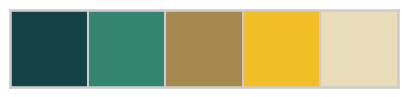

In [41]:
sns.set_style("whitegrid")
sns.set_context("talk")

hex_colors = ['#144246',
              #'#69657e',
              '#338470',
              '#a6874e',
              #'#FFFF33', '#FFD801', '#FFDF00',
              '#f2be25', '#e8dcb9']
pal = sns.color_palette(hex_colors, desat=1)
sns.palplot(pal)

In [42]:
shortnames = {
    'COL': 'COL',
    ' COL': 'COL',
    ' CTD': 'CTD',
    ' CTNR': 'CTNR',
    ' SL': 'SL',
    ' SLO': 'SLO',
    'RND':'RND',
    'allOrdersPopularity_future_z2': 'AOPF2',
    'allOrdersPopularity_future_z3': 'AOPF3',
    'allOrdersPopularity_future_z5': 'AOPF5',
    'allOrdersPopularity_past_z2': 'AOPP2',
    'allOrdersPopularity_past_z3': 'AOPP3',
    'allOrdersPopularity_past_z5': 'AOPP5',
    'classBasedCycleTime_z2': 'CBCT2',
    'classBasedCycleTime_z3': 'CBCT3',
    'classBasedCycleTime_z5': 'CBCT5',
    'retrievalPopularity_future_z2': 'ROPF2',
    'retrievalPopularity_future_z3': 'ROPF3',
    'retrievalPopularity_future_z5': 'ROPF5',
    'retrievalPopularity_past_z2': 'ROPP2',
    'retrievalPopularity_past_z3': 'ROPP3',
    'retrievalPopularity_past_z5': 'ROPP5',
    'VeryGreedy COL': 'GCOL',
    'DQN': 'COL',
    'SAC': 'SAC'
}

In [220]:
def order_files(src_dir):
    files = os.listdir(src_dir)
    pbar = tqdm(total=len(files))
    for i in range(len(files)):
        f_name = files[i]
        print(f_name)
        if not f_name.endswith('.csv') or 'actions' in f_name:
            continue
        segs = f_name.split('_')
        pt = segs[1]
        charging_policy = segs[3]
        th = segs[4]
        name = segs[3]
        # new_name = shortnames[name]
        interrupted = segs[5]
        orders = f'{int(segs[-1].split(".")[0]):06}'
        tgt_dir = f'{src_dir}/partition_{pt}/{th}/{interrupted}/{name}/'
        if not os.path.exists(tgt_dir):
            os.makedirs(tgt_dir)
        shutil.move(f'{src_dir}/{f_name}',
                    f'{tgt_dir}/{orders}.csv')
        pbar.update(1)
order_files(root_dir)

  0%|          | 0/440 [00:00<?, ?it/s]

boxplot__kpi__average_service_time_thresholds_per_week.png
boxplot__kpi__average_service_time_thresholds_vs_interrupt_per_week.png
boxplot__kpi__max_ret_buffer_per_week.png
boxplot__queued_retrieval_thresholds_vs_interrupt_per_week.png
fill_level_weeks.png
n_orders.png
partition_0
partition_1
partition_10
partition_11
partition_12
partition_13
partition_2
partition_3
partition_4
partition_5
partition_6
partition_7
partition_8
partition_9
pt_0_COL_PPO_th100_False_596.csv
pt_10_COL_PPO_th100_False_1000.csv
pt_10_COL_PPO_th100_False_10009.csv
pt_10_COL_PPO_th100_False_11010.csv
pt_10_COL_PPO_th100_False_12011.csv
pt_10_COL_PPO_th100_False_13012.csv
pt_10_COL_PPO_th100_False_14013.csv
pt_10_COL_PPO_th100_False_15014.csv
pt_10_COL_PPO_th100_False_16015.csv
pt_10_COL_PPO_th100_False_17016.csv
pt_10_COL_PPO_th100_False_18017.csv
pt_10_COL_PPO_th100_False_19018.csv
pt_10_COL_PPO_th100_False_2001.csv
pt_10_COL_PPO_th100_False_20019.csv
pt_10_COL_PPO_th100_False_21020.csv
pt_10_COL_PPO_th100_Fal

In [221]:
def load_storage_strategy_dataframe(data_root):
    n_zones = 3
    strategy_name = data_root.split('/')[4]
    interrupted = data_root.split('/')[5]
    go_charging = data_root.split('/')[6]
    # n_zones = int(strategy_name[-1]) if strategy_name[-1].isdigit() else 3
    if not os.path.exists(data_root):
        print(f"did not find path {data_root}; skipping...")
        return
    dfs = []
    csv_f_names = os.listdir(data_root)
    # pbar = tqdm(total=len(csv_f_names))
    print(f'Loading result files into dataframes for the '
          f'{strategy_name} simulation run...')
    for f_name in csv_f_names:
        if os.path.isdir(f'{data_root}/{f_name}') or f_name == '.DS_Store':
            #print(f'{data_root}/{f_name}')
            continue
        df_result_part = pd.read_csv(f'{data_root}/{f_name}', index_col=0)
        n_rows = df_result_part.shape[0]
        df_result_part['strategy_name'] = [f"{go_charging}_{strategy_name}_{interrupted}"] * n_rows
        df_result_part['n_zones'] = [n_zones] * n_rows
        df_result_part['interrupted'] = [interrupted] * n_rows
        df_result_part['go_charging'] = [go_charging] * n_rows

        dfs.append(df_result_part)
        # print(strategy_name, n_zones, order_set_nr)
        # pbar.update(1)
    strategy_df = pd.concat(dfs).reset_index(drop=True)
    strategy_df.name = f"{go_charging}_{strategy_name}_{interrupted}"
    return strategy_df

# dfs_d = dict({})
# n_agvs = 40
# for n_cs in range(1,9):
#     dfs_d[n_cs] = []
#     for shortname in shortnames.values():
#         df = load_storage_strategy_dataframe(
#             f'{root_dir}/n_agvs__{n_agvs}/n_cs__{n_cs}/{shortname}')
#         if df is not None:
#             dfs_d[n_cs].append(df)
dfs_d = dict({})
partitions = [i for i in range(n_partitions)]
thresholds = [30, 40, 50, 60, 70, 80, 90, 100]
interrupted = ["True", "False"]
go_charging = ["FixedCharge", "Opportunistic", "PPO"]
for pt in partitions:
    print(f"Loading partition {pt}")
    dfs_d[pt] = []
    for th in thresholds:
        for interrupt in interrupted:
            for strat in go_charging:
                path = f'{root_dir}/partition_{pt}/th{th}/{interrupt}/{strat}'
                df = load_storage_strategy_dataframe(path)
                if df is not None:
                    dfs_d[pt].append(df)

Loading partition 0
Loading result files into dataframes for the th30 simulation run...
Loading result files into dataframes for the th30 simulation run...
did not find path ./result_data_charging_wepa/charging_strat_comp/partition_0/th30/True/PPO; skipping...
Loading result files into dataframes for the th30 simulation run...
Loading result files into dataframes for the th30 simulation run...
did not find path ./result_data_charging_wepa/charging_strat_comp/partition_0/th30/False/PPO; skipping...
Loading result files into dataframes for the th40 simulation run...
Loading result files into dataframes for the th40 simulation run...
did not find path ./result_data_charging_wepa/charging_strat_comp/partition_0/th40/True/PPO; skipping...
Loading result files into dataframes for the th40 simulation run...
Loading result files into dataframes for the th40 simulation run...
did not find path ./result_data_charging_wepa/charging_strat_comp/partition_0/th40/False/PPO; skipping...
Loading result

In [73]:
# dfs_d_actions = dict({})
# models = ["PPO"]
# for pt in partitions:
#     dfs_d_actions[pt] = []
#     for model in models:
#         path = f'{root_dir}/pt_{pt}_thPPO_actions.csv'
#         df = pd.read_csv(path)
#         if df is not None:
#             dfs_d_actions[pt].append(df)

FileNotFoundError: [Errno 2] No such file or directory: './result_data_charging_wepa/charging_strat_comp/pt_0_thPPO_actions.csv'

In [152]:
# thresholds = [0, 30, 40, 50, 60, 70, 80, 90, 100]
# for pt in dfs_d_actions.keys():
#     dfs_d_actions[pt][0]["Action"] = dfs_d_actions[pt][0]["Action"].apply(lambda x: thresholds[x])

In [154]:
# dfs_d_actions[0]

[     Unnamed: 0  Step  Action  kpi__makespan  kpi__average_service_time  \
 0             0     1     100     86567.6000                  99.650000   
 1             0     2     100     86587.3000                  99.533333   
 2             0     3     100     86618.7000                  99.825000   
 3             0     4     100     86641.1000                 101.680000   
 4             0     5     100     86645.7000                 102.683333   
 ..          ...   ...     ...            ...                        ...   
 591           0   592     100    103848.1000                 120.220911   
 592           0   593     100    103978.7000                 120.211616   
 593           0   594     100    104083.4000                 120.180000   
 594           0   595     100    104214.7000                 120.170805   
 595           0   596     100    104479.6375                 120.170805   
 
      avg_battery_level  n_queued_charging_events  n_queued_retrieval_orders  \
 0    

In [114]:
def gen_result_table(dfs_d, value, mode):
    list_of_dfs = []
    for idx in partitions:
        print("Loading partition", idx)
        # print(idx)
        df_results_pt = pd.DataFrame(columns=[f"{idx}"])
        for df in dfs_d[idx]:
            # print(df.name)
            # print(df["kpi__average_service_time"].mean())
            df = df.sort_values(by="kpi__makespan")
            if mode == "mean":
                row_data = pd.DataFrame(data={f"{idx}": [df[value].mean()]})  # df["kpi__makespan"].iloc[-1]]
            elif mode == "last":
                row_data = pd.DataFrame(
                    data={f"{idx}": [float(df[value].iloc[-1].round(decimals=2))]})  # df["kpi__makespan"].iloc[-1]]
            elif mode == "max":
                row_data = pd.DataFrame(data={f"{idx}": [df[value].max()]})
            # print(df["kpi__makespan"].iloc[-1])
            df_results_pt = pd.concat([df_results_pt, row_data])
        list_of_dfs.append(df_results_pt)
        print(len(df_results_pt))
    strategy_col = pd.DataFrame(columns=["Strategy"])
    for th in thresholds:
        row = pd.DataFrame(data={"Strategy": [th]})
        strategy_col = pd.concat([strategy_col, row])
    print(strategy_col)
    result_df = pd.DataFrame()
    result_df = pd.concat([result_df, strategy_col], axis=1)
    for df in list_of_dfs:
        result_df = pd.concat([result_df, df], axis=1)
    result_df = result_df.transpose().reset_index()
    new_header = result_df.iloc[0]
    result_df.drop(index=0, inplace=True)
    result_df.columns = new_header
    # result_df["Avg. overall"] = result_df.loc[:, [40, 50, 60, 70, 80, 90, 100, "no_battery_constraints"]].mean(axis = 1)
    # result_df["Std"] = result_df.iloc[:, 1:5].std(axis=1)
    # fill_lvl = [68, 87, 90, 77, 74, 86, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    # result_df.insert(11, "Fill Level", fill_lvl, True)
    return result_df

In [47]:
thresholds = [30, 40, 50, 60, 70, 80, 90, 100]
# thresholds = ["opportunity", 100]
result_df = gen_result_table(dfs_d, "kpi__average_service_time", "last")
result_df

Loading partition 0
10
Loading partition 1
10
Loading partition 2
10
Loading partition 3
10
Loading partition 4
10
Loading partition 5
10
Loading partition 6
10
Loading partition 7
10
Loading partition 8
10
Loading partition 9
10
Loading partition 10
10
Loading partition 11
10
Loading partition 12
10
Loading partition 13
10
       Strategy
0            30
0            40
0            50
0            60
0            70
0            80
0            90
0           100
0   opportunity
0  opportunity+


,Strategy,30,40,50,60,70,80,90,100,opportunity,opportunity+
1,0,109.94,884.43,109.94,887.26,109.94,859.15,109.94,762.35,116.35,116.35
2,1,604.39,510.9,504.52,529.92,630.77,788.36,895.91,1058.0,1460.82,745.15
3,2,1175.94,891.81,784.62,747.28,780.45,781.12,800.05,863.21,2167.87,1150.35
4,3,1261.2,914.84,774.82,841.77,831.64,793.01,850.52,900.12,1638.13,881.97
5,4,1153.42,872.22,747.6,759.95,800.83,859.56,900.71,1012.69,1680.29,973.19
6,5,1433.84,994.41,904.87,861.08,892.77,1042.25,1144.91,1244.21,1714.84,990.88
7,6,637.44,556.63,525.81,518.34,503.41,490.53,484.42,504.21,1114.74,663.46
8,7,748.53,614.31,619.95,684.8,740.66,842.73,981.96,1088.21,1577.24,861.28
9,8,789.19,690.69,684.51,675.17,669.22,619.2,612.8,617.13,1059.32,636.15
10,9,1799.76,1649.04,1465.2,1278.93,1184.2,1081.47,1049.43,1045.09,1835.39,1146.67


In [49]:
# Initialize lists to store the results
avg_service_times = []
max_service_times = []
ppo_results = {i: 0 for i in range(n_partitions)}
# Loop through each partition to retrieve and compute statistics
for i in range(n_partitions):
    # Construct the key for the specific partition
    key = f"logs/Evaluation/{i}/Servicetime"

    # Retrieve history for the current partition
    history_df = run.history(keys=[key])

    # Check if the data is available for this partition
    if key in history_df:
        # Calculate the average and max service time for this partition
        avg_service_time = history_df[key].iloc[-1]
        max_service_time = history_df[key].max()
        ppo_results[i] = avg_service_time

        # Append to the result lists
        avg_service_times.append((i, avg_service_time))
        max_service_times.append((i, max_service_time))

        # Print the results for this partition
        # print(f"Partition {i}:")
        # print(f"  Average Service Time: {avg_service_time}")
        # print(f"  Maximum Service Time: {max_service_time}")
    else:
        print(f"Data for Partition {i} not found.")
new_col = pd.DataFrame(data=[ppo_results]).transpose()
result_df.reset_index(inplace=True, drop=True)
result_df = pd.concat([result_df, new_col], axis=1)
result_df = result_df.rename(columns={0: "PPO"})
print(result_df)

   Strategy       30       40       50       60       70       80       90  \
0         0   109.94   884.43   109.94   887.26   109.94   859.15   109.94   
1         1   604.39    510.9   504.52   529.92   630.77   788.36   895.91   
2         2  1175.94   891.81   784.62   747.28   780.45   781.12   800.05   
3         3   1261.2   914.84   774.82   841.77   831.64   793.01   850.52   
4         4  1153.42   872.22    747.6   759.95   800.83   859.56   900.71   
5         5  1433.84   994.41   904.87   861.08   892.77  1042.25  1144.91   
6         6   637.44   556.63   525.81   518.34   503.41   490.53   484.42   
7         7   748.53   614.31   619.95    684.8   740.66   842.73   981.96   
8         8   789.19   690.69   684.51   675.17   669.22    619.2    612.8   
9         9  1799.76  1649.04   1465.2  1278.93   1184.2  1081.47  1049.43   
10       10  1304.64   958.69   909.03   989.78  1165.79  1366.59  1474.46   
11       11   721.44   685.04   628.13   648.74   651.04   705.2

In [39]:
dfs_d[1]

[       total_distance  average_distance  travel_time_retrieval_ave  \
 0               353.6         29.466667                  16.450000   
 1              1524.4         54.442857                  54.852000   
 2              2146.2         63.123529                  59.246552   
 3              2480.4         65.273684                  74.958333   
 4              2834.4         67.485714                  71.670000   
 ...               ...               ...                        ...   
 20586       4445749.0         86.157926                 121.039066   
 20587       4446880.0         86.168155                 121.039693   
 20588       4447048.2         86.168075                 121.042442   
 20589       4447178.8         86.168936                 121.045493   
 20590       4447475.8         86.168013                 121.048923   
 
        distance_retrieval_ave  total_shift_distance  utilization_time  \
 0                   26.260000                   0.0          0.000006  

In [33]:
key = f"rollout/ep_rew_mean"

# Retrieve history for the current partition
df_ep_reward = run.history(keys=[key])

In [34]:
df_ep_reward

,_step,rollout/ep_rew_mean
0,39378.0,-25930.2440
1,45985.0,-25930.2440
2,62367.0,-25930.2440
3,72774.0,-25930.2440
4,85074.0,-18285.9500
...,...,...
495,3980856.0,-4578.3774
496,3986769.0,-4578.3774
497,3995198.0,-4578.3774
498,4005077.0,-4578.3774


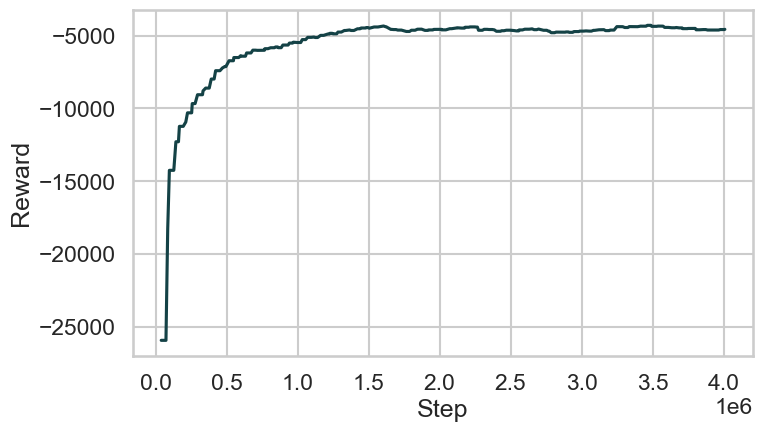

In [37]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)

ax = sns.lineplot(ax=ax, x='_step', y='rollout/ep_rew_mean', color=next(palette), data=df_ep_reward)

# ax.legend(title='DQN Results')  
#ax.set_xlim((-5000, xlim + 20000))
ax.set_xlabel('Step')
ax.set_ylabel('Reward')
plt.savefig(f'{root_dir}/plot__rl__reward_r1_ppo.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

In [370]:
40 * 60

2400

In [125]:
# result_df["std"] = result_df.iloc[:, 1:].std(axis = 1)

In [301]:
result_melt = pd.melt(result_df, id_vars=["Strategy"], value_vars=[100, "opportunity+", "PPO"], var_name="charging_strategy")

In [307]:
result_melt

,Strategy,charging_strategy,value
0,0,100,109.94
1,1,100,1058.0
2,2,100,863.21
3,3,100,900.12
4,4,100,1012.69
5,5,100,1244.21
6,6,100,504.21
7,7,100,1088.21
8,8,100,617.13
9,9,100,1045.09


In [48]:
col_names = list(result_melt['charging_strategy'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()

_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='charging_strategy', y='value', data=result_melt, hue="charging_strategy")
ax.set_xticklabels(labels=col_names)
ax.set_xlabel("Week")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.set_ylabel("Average Service Time\n(in Seconds)")
plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_per_week.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

NameError: name 'result_melt' is not defined

In [127]:
df = dfs_d[1][0]

In [128]:
df[(df["n_free_agvs"]==0)&(df["n_agv_depleted"]>0)].shape[0]

15912

In [129]:
df.columns

Index(['total_distance', 'average_distance', 'travel_time_retrieval_ave',
       'distance_retrieval_ave', 'total_shift_distance', 'utilization_time',
       'n_queued_retrieval_orders', 'n_queued_delivery_orders',
       'n_finished_orders', 'kpi__throughput', 'kpi__makespan',
       'kpi__average_service_time', 'kpi__cycle_time', 'runtime',
       'n_free_agvs', 'n_pallet_shifts', 'n_steps', 'n_decision_steps',
       'fill_level', 'entropy', 'n_queued_charging_events',
       'avg_battery_level', 'n_agv_depleted', 'n_agv_not_depleted',
       'n_charging_events', 'strategy_name', 'n_zones'],
      dtype='object')

In [50]:
Result = namedtuple('Result', [
    'notfree_depleted_agv',
    'average_service_time',
    'week',
    'threshold'])        

In [51]:
scoring = "average_service_time"
for week in range(14):
    print("Week:", week)
    scores = []
    for i in range(len(thresholds)):
        df = dfs_d[week][i]
        end_row = df.iloc[-1, :]
        res = Result(df[(df["n_free_agvs"]==0) ].shape[0],
                     end_row["kpi__average_service_time"],
                     week, thresholds[i])
        scores.append(res)
        scores_sorted = sorted(scores, key=lambda x: getattr(x, scoring))

    for t in range(len(thresholds)):
        res = scores_sorted[t]
        print(res.average_service_time, res.notfree_depleted_agv, res.threshold)
        # print(scores_sorted)
        # print(df[(df["n_free_agvs"]==0)&(df["n_agv_depleted"]>0)].shape[0], end_row["kpi__average_service_time"])

Week: 0
109.93624161073764 0 30
109.93624161073764 0 50
109.93624161073764 0 70
109.93624161073764 0 90
116.3466442953018 0 opportunity
116.3466442953018 0 opportunity+
762.3549984217163 238111 100
859.1537600163609 239373 80
884.4290459353244 253798 40
887.258464050387 243711 60
Week: 1
504.5176296109299 16776 50
510.89785506926336 16939 40
529.9242119213689 17101 60
604.3918667760527 18353 30
630.7663074689946 17284 70
745.1505569404516 21540 opportunity+
788.3604682717562 17336 80
895.9051016061421 17296 90
1057.9995523176883 17834 100
1460.8179565965029 24619 opportunity
Week: 2
747.2798446980619 22793 60
780.4488969951032 22854 70
781.1232559231568 22723 80
784.6224895261499 22861 50
800.051975946259 22357 90
863.2120098959994 22349 100
891.8133176827631 23544 40
1150.3450245593513 26638 opportunity+
1175.9417267407937 24695 30
2167.870047674159 29695 opportunity
Week: 3
774.8173129746361 23427 50
793.008225278705 22635 80
831.6396516669703 23276 70
841.7677391339225 23288 60
850.

In [52]:
latex_table = result_df.to_latex(index=False, 
                          caption="Performance of Different Strategies by Threshold Values", 
                          label="table:strategies", 
                          column_format="|c|c|c|c|c|c|c|c|c|", 
                          float_format="%.2f",
                          escape=False,
                          multicolumn_format='c')
print(type(latex_table), '\n', latex_table)

<class 'str'> 
 \begin{table}
\caption{Performance of Different Strategies by Threshold Values}
\label{table:strategies}
\begin{tabular}{|c|c|c|c|c|c|c|c|c|}
\toprule
Strategy & 30 & 40 & 50 & 60 & 70 & 80 & 90 & 100 & opportunity & opportunity+ & PPO \\
\midrule
0 & 109.94 & 884.43 & 109.94 & 887.26 & 109.94 & 859.15 & 109.94 & 762.35 & 116.35 & 116.35 & 117.10 \\
1 & 604.39 & 510.90 & 504.52 & 529.92 & 630.77 & 788.36 & 895.91 & 1058.00 & 1460.82 & 745.15 & 983.56 \\
2 & 1175.94 & 891.81 & 784.62 & 747.28 & 780.45 & 781.12 & 800.05 & 863.21 & 2167.87 & 1150.35 & 1471.82 \\
3 & 1261.20 & 914.84 & 774.82 & 841.77 & 831.64 & 793.01 & 850.52 & 900.12 & 1638.13 & 881.97 & 1447.34 \\
4 & 1153.42 & 872.22 & 747.60 & 759.95 & 800.83 & 859.56 & 900.71 & 1012.69 & 1680.29 & 973.19 & 1491.86 \\
5 & 1433.84 & 994.41 & 904.87 & 861.08 & 892.77 & 1042.25 & 1144.91 & 1244.21 & 1714.84 & 990.88 & 1604.80 \\
6 & 637.44 & 556.63 & 525.81 & 518.34 & 503.41 & 490.53 & 484.42 & 504.21 & 1114.74 & 663.46 

In [53]:
def gen_latex_tabel(subset_min, th_comp_df):
    th_comp_df.rename(columns={"lower_bound": "Lower Bound",
                               "Strategy": "Partition"}, inplace=True)

    th_comp_df = th_comp_df.set_index("Partition")

    round = th_comp_df.columns

    if "Std" in th_comp_df.columns:
        th_comp_view = th_comp_df.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
            (val): '{:.2f}' for val in round}).text_gradient(cmap="rainbow", subset="Std", vmin=0, vmax=10)
    else:
        th_comp_view = th_comp_df.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
            (val): '{:.2f}' for val in round})
    latex_string = th_comp_view.to_latex(convert_css=True, hrules=True)
    return latex_string

result_melt = pd.melt(result_df, id_vars=["Strategy"], value_vars=[
    30, 40, 50, 60, 70, 80, 90, 100, "PPO"], var_name="Threshold")

th_comp_df = result_df[["Strategy", 30, 40, 50, 60, 70, 80, 90, 100, "PPO"]]
th_comp_df.rename(columns={"Strategy": "Partition"}, inplace=True)

th_comp_df = th_comp_df.set_index("Partition")
subset_min = [
    30, 40, 50, 60, 70, 80, 90, 100, "PPO"
]

round = [
    30, 40, 50, 60, 70, 80, 90, 100, "PPO"
]

th_comp_view = th_comp_df.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
 (val): '{:.2f}' for val in round}) #.text_gradient(cmap="rainbow", subset="Std", vmin=0, vmax=10)
latex_string = th_comp_view.to_latex(convert_css=True, hrules=True)

subset_no_rl = [30, 40, 50, 60, 70, 80, 90, 100]
subset_rl = [30, 40, 50, 60, 70, 80, 90, 100, "PPO"]
latex_string_no_rl = gen_latex_tabel(subset_no_rl, result_df[["Strategy", 30, 40, 50, 60, 70, 80, 90, 100]])
latex_string_rl = gen_latex_tabel(subset_rl, result_df[["Strategy", 30, 40, 50, 60, 70, 80, 90, 100, "PPO"]])

result_mean = result_df[[30, 40, 50, 60, 70, 80, 90, 100, "PPO"]].mean()
result_mean.rename("Mean", inplace=True)
result_std = result_df[[30, 40, 50, 60, 70, 80, 90, 100, "PPO"]].std()
# result_std.rename("Std", inplace=True)
result_m_s = pd.concat([result_mean, result_std], axis=1)
result_m_s.reset_index(inplace=True)
# result_std
result_m_s.rename(columns={0: "Strategy"}, inplace=True)
result_m_s = result_m_s[["Strategy", "Mean"]]
result_m_s = result_m_s.set_index("Strategy")

subset_min = ["Mean"]
round = ["Mean"]
result_m_s_view = result_m_s.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
 (val): '{:.2f}' for val in round})
latex_string = result_m_s_view.to_latex(convert_css=True, hrules=True)

C:\Users\zm0714\AppData\Local\Temp\ipykernel_44060\2516513090.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th_comp_df.rename(columns={"Strategy": "Partition"}, inplace=True)
C:\Users\zm0714\AppData\Local\Temp\ipykernel_44060\2516513090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th_comp_df.rename(columns={"lower_bound": "Lower Bound",
C:\Users\zm0714\AppData\Local\Temp\ipykernel_44060\2516513090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [54]:
print(type(latex_string_no_rl), '\n', latex_string_no_rl)

<class 'str'> 
 \begin{tabular}{lllllllll}
\toprule
 & 30 & 40 & 50 & 60 & 70 & 80 & 90 & 100 \\
Partition &  &  &  &  &  &  &  &  \\
\midrule
0 & \bfseries 109.94 & 884.43 & \bfseries 109.94 & 887.26 & \bfseries 109.94 & 859.15 & \bfseries 109.94 & 762.35 \\
1 & 604.39 & 510.90 & \bfseries 504.52 & 529.92 & 630.77 & 788.36 & 895.91 & 1058.00 \\
2 & 1175.94 & 891.81 & 784.62 & \bfseries 747.28 & 780.45 & 781.12 & 800.05 & 863.21 \\
3 & 1261.20 & 914.84 & \bfseries 774.82 & 841.77 & 831.64 & 793.01 & 850.52 & 900.12 \\
4 & 1153.42 & 872.22 & \bfseries 747.60 & 759.95 & 800.83 & 859.56 & 900.71 & 1012.69 \\
5 & 1433.84 & 994.41 & 904.87 & \bfseries 861.08 & 892.77 & 1042.25 & 1144.91 & 1244.21 \\
6 & 637.44 & 556.63 & 525.81 & 518.34 & 503.41 & 490.53 & \bfseries 484.42 & 504.21 \\
7 & 748.53 & \bfseries 614.31 & 619.95 & 684.80 & 740.66 & 842.73 & 981.96 & 1088.21 \\
8 & 789.19 & 690.69 & 684.51 & 675.17 & 669.22 & 619.20 & \bfseries 612.80 & 617.13 \\
9 & 1799.76 & 1649.04 & 1465.20 & 

In [219]:
Result = namedtuple('Result', [
    'total_distance',
    #     'average_distance',
    #     'travel_time_retrieval_ave',
    'total_shift_distance',
    'distance_retrieval_ave',
    'utilization_time',
    'makespan',
    'cycle_time',
    'entropy',
    'average_service_time',
    'throughput', 'max_delivery_buffer', 'max_retrieval_buffer', 'mean_retrieval_buffer',
    'max_agv_depleted', 'mean_agv_depleted',
    'max_cs_queue', 'mean_cs_queue',
    'index', 
    'name',
    'go_charging',
    'interrupted',
    'threshold'])


def get_best_storage_strategies(experiment_dfs, n_best, exclude, scoring='average_service_time'):
    scores = []
    idx = 0
    for df in experiment_dfs:
        df_sorted = df[[
            'total_distance',
            # 'average_distance',
            # 'travel_time_retrieval_ave',
            'total_shift_distance',
            'distance_retrieval_ave',
            'utilization_time',
            'kpi__makespan',
            'kpi__cycle_time',
            'entropy',
            'kpi__average_service_time',
            'kpi__throughput', 'n_finished_orders',
            'n_queued_delivery_orders', 'n_queued_retrieval_orders', 'n_agv_depleted', 'n_queued_charging_events']
        ].sort_values('kpi__makespan')
        if df.name == "th_no_battery_constraints":
            df_sorted.name = "lower bound"
        if df.name == "dqn" or df.name == "sac":
            df_sorted.name = df.name
        else:
            df_sorted.name = df.name  # .split("_")[1]

        end_row = df_sorted.iloc[-1, :]
        res = Result(
            end_row['total_distance'],
            # end_row['average_distance'],
            # end_row['travel_time_retrieval_ave'],
            end_row['total_shift_distance'],
            end_row['distance_retrieval_ave'],
            end_row['utilization_time'],
            end_row['kpi__makespan'],
            end_row['kpi__cycle_time'],
            end_row['entropy'],
            end_row['kpi__average_service_time'],
            end_row['kpi__throughput'],
            df_sorted['n_queued_delivery_orders'].max(),
            df_sorted['n_queued_retrieval_orders'].max(),
            df_sorted['n_queued_retrieval_orders'].mean(),
            df_sorted['n_agv_depleted'].max(),
            df_sorted['n_agv_depleted'].mean(),
            df_sorted['n_queued_charging_events'].max(),
            df_sorted['n_queued_charging_events'].mean(),
            idx, 
            df_sorted.name,
            df_sorted.name.split('_')[0],
            df_sorted.name.split('_')[2],
            df_sorted.name.split('_')[1]
        )
        scores.append(res)
        idx += 1
    scores_sorted = sorted(scores, key=lambda x: getattr(x, scoring))
    df_selection = []
    n_best = min(n_best, len(scores_sorted))
    print(n_best)
    for i in range(n_best):
        res = scores_sorted[i]
        print(res.average_service_time, i, experiment_dfs[scores_sorted[i].index].name)
        df_selection.append(experiment_dfs[scores_sorted[i].index])
    print("done")
    res_df = pd.DataFrame(data=scores_sorted)
    return df_selection, res_df


best_dfs_d = dict({})
res_overview_df_d = dict({})
for pt, dfs_s in dfs_d.items():
    print(f"Heuristic Service Time Ranks for partition {pt}:")
    best_dfs_d[pt], res_overview_df_d[pt] = get_best_storage_strategies(
        dfs_s, 10, [], 'average_service_time')


# result_df_copy = result_df_copy.drop([30, 100], axis=1)



Heuristic Service Time Ranks for partition 0:
10
109.93624161073764 0 FixedCharge_th30_True
109.93624161073764 1 FixedCharge_th30_False
109.93624161073764 2 FixedCharge_th40_True
109.93624161073764 3 FixedCharge_th40_False
109.93624161073764 4 FixedCharge_th50_True
109.93624161073764 5 FixedCharge_th50_False
109.93624161073764 6 FixedCharge_th60_True
109.93624161073764 7 FixedCharge_th60_False
109.93624161073764 8 FixedCharge_th70_True
109.93624161073764 9 FixedCharge_th70_False
done
Heuristic Service Time Ranks for partition 1:
10
474.9025748635264 0 FixedCharge_th90_True
475.27668738758433 1 FixedCharge_th100_True
479.78806916790097 2 FixedCharge_th30_True
479.94934169007183 3 FixedCharge_th40_True
481.1808210532947 4 FixedCharge_th60_True
483.7380581237561 5 FixedCharge_th70_True
486.8770762992658 6 FixedCharge_th50_True
489.41513994509467 7 FixedCharge_th80_True
514.030845508187 8 Opportunistic_th30_True
553.3343879177139 9 Opportunistic_th40_True
done
Heuristic Service Time Ranks 

In [ ]:
result_df.describe()

result_df_copy = result_df.copy()
res_paper_df = result_df.copy()

In [200]:
idx = 10
res_paper_df["Min"] = result_df_copy.iloc[:, 1:idx].min(axis=1)
res_paper_df["Min Strat"] = result_df_copy.iloc[:, 1:idx].astype("float").idxmin(axis=1)
res_paper_df["Max"] = result_df_copy.iloc[:, 1:idx].max(axis=1)
res_paper_df["Max Strat"] = result_df_copy.iloc[:, 1:idx].astype("float").idxmax(axis=1)

res_paper_df = res_paper_df[["Strategy", "Min", "Min Strat", "Max", "Max Strat", "PPO"]]

print(res_paper_df)

   Strategy      Min  Min Strat      Max    Max Strat          PPO
0         0   109.94         30   887.26           60   117.104195
1         1   504.52         50  1460.82  opportunity   983.562200
2         2   747.28         60  2167.87  opportunity  1471.820800
3         3   774.82         50  1638.13  opportunity  1447.341100
4         4    747.6         50  1680.29  opportunity  1491.856000
5         5   861.08         60  1714.84  opportunity  1604.798500
6         6   484.42         90  1114.74  opportunity   707.061000
7         7   614.31         40  1577.24  opportunity  1326.757000
8         8    612.8         90  1059.32  opportunity   936.014200
9         9  1045.09        100  1835.39  opportunity  1988.938200
10       10   909.03         50  2938.52  opportunity  1768.860500
11       11   628.13         50  1128.77  opportunity   966.934200
12       12   623.05         60  1415.19  opportunity  1002.194200
13       13   1426.0         40  3915.64  opportunity  4125.73

In [201]:
res_overview_df_d

{0:     total_distance  total_shift_distance  distance_retrieval_ave  \
 0         114048.2                   0.0                     0.0   
 1         114048.2                   0.0                     0.0   
 2         114048.2                   0.0                     0.0   
 3         114048.2                   0.0                     0.0   
 4         114048.2                   0.0                     0.0   
 5         114048.2                   0.0                     0.0   
 6         114048.2                   0.0                     0.0   
 7         114048.2                   0.0                     0.0   
 8         114048.2                   0.0                     0.0   
 9         114048.2                   0.0                     0.0   
 10        115821.6                   0.0                     0.0   
 11        115821.6                   0.0                     0.0   
 12        116201.0                   0.0                     0.0   
 13        116201.0            

In [202]:
idx = 1
res_overview_df = res_overview_df_d[idx]
best_dfs = best_dfs_d[idx]
res_overview_df

,total_distance,total_shift_distance,distance_retrieval_ave,utilization_time,makespan,cycle_time,entropy,average_service_time,throughput,max_delivery_buffer,...,mean_retrieval_buffer,max_agv_depleted,mean_agv_depleted,max_cs_queue,mean_cs_queue,index,name,go_charging,interrupted,threshold
0,5.386972e+06,370045.2,169.240920,0.220059,763131.8,282593.806840,0.612756,474.902575,0.041528,6,...,18.327317,19,2.690953,18,2.462308,12,FixedCharge_th90_True,FixedCharge,True,th90
1,5.400751e+06,368617.2,170.723420,0.219833,763132.5,283197.787832,0.616741,475.276687,0.041528,6,...,18.176896,19,2.737402,18,2.497681,16,FixedCharge_th100_True,FixedCharge,True,th100
2,5.401162e+06,371212.8,169.718255,0.220288,763124.1,279568.341395,0.597436,481.180821,0.041528,6,...,18.509798,17,2.854848,16,2.602158,0,FixedCharge_th60_True,FixedCharge,True,th60
3,5.435657e+06,374082.8,170.554562,0.221796,763123.4,268879.287548,0.600756,483.738058,0.041528,6,...,18.601054,19,2.780947,17,2.531476,4,FixedCharge_th70_True,FixedCharge,True,th70
4,5.458613e+06,367043.6,170.390006,0.220499,763122.7,284319.031176,0.584205,489.415140,0.041528,6,...,18.754063,18,2.879840,18,2.638509,8,FixedCharge_th80_True,FixedCharge,True,th80
5,6.394052e+06,362714.8,177.647825,0.224953,763119.2,281500.349595,0.632849,621.296015,0.041528,8,...,23.258275,33,6.575148,33,5.210470,17,Opportunistic_th100_True,Opportunistic,True,th100
6,5.624150e+06,364627.2,175.480410,0.224731,763129.7,278820.522608,0.664477,642.577987,0.041528,8,...,23.451232,33,5.918968,33,5.029977,13,Opportunistic_th90_True,Opportunistic,True,th90
7,5.529127e+06,364142.8,173.746092,0.223324,763121.3,279758.647031,0.641336,647.357262,0.041528,7,...,23.523745,32,5.437348,32,4.875895,1,Opportunistic_th60_True,Opportunistic,True,th60
8,5.363618e+06,366758.0,169.520251,0.219646,763119.9,283914.236871,0.611432,660.772328,0.041528,6,...,23.030261,27,3.008898,27,2.814837,2,FixedCharge_th60_False,FixedCharge,False,th60
9,5.585390e+06,360080.0,175.563288,0.223442,763138.1,270979.700738,0.652713,687.134720,0.041527,8,...,25.281089,32,5.958158,32,5.180588,9,Opportunistic_th80_True,Opportunistic,True,th80


In [203]:
res_paper_df = res_overview_df.copy()
res_paper_df.index = res_overview_df['name'].values
res_paper_df = res_paper_df.drop(['name', 'index', 'makespan'], axis='columns')
res_paper_df = res_paper_df[[
    'average_service_time', 
    # 'total_distance', 
    # 'total_shift_distance', 
    # 'max_delivery_buffer', 
    'max_retrieval_buffer', #'entropy',
    'mean_retrieval_buffer',
    'max_agv_depleted',
    'mean_agv_depleted'
    #'cycle_time', 
    #'throughput', 
    # 'utilization_time'
]]
#res_paper_df['throughput'] = res_paper_df['throughput'] * 3600
# res_paper_df['total_distance'] += res_paper_df['total_shift_distance']
# res_paper_df.drop(['total_shift_distance'], axis=1, inplace=True)
# res_paper_df['total_distance'] /= (40 * 1000)
#res_paper_df['cycle_time'] = res_paper_df['cycle_time'] / (3600 * 24)
res_paper_df = res_paper_df.round(decimals=2)
res_paper_df.index.name = 'Strategy'
res_paper_df.rename({
    # 'total_distance': 'Total Distance (in km)', 
    # 'cycle_time': 'Turnover Time (in days)',
    # 'entropy': 'Lanewise Entropy',
    'average_service_time': 'Avg Service Time (in s)',
    # 'throughput': 'Throughput (pallets per hour)',
    # 'max_delivery_buffer': 'Maximum Delivery Queue Length', 
    'max_retrieval_buffer': 'Max Retrieval Queue Length', 
    'mean_retrieval_buffer': 'Mean Retrieval Queue Length', 
    # 'utilization_time': 'Utilization Rate',
    'max_agv_depleted': 'Max Count of Depleted AMR',
    'mean_agv_depleted': 'Mean Count of Depleted AMR'
}, axis='columns', inplace=True)
res_paper_df.columns.name = 'Metric'
#res_paper_df = res_paper_df.drop('COPL', axis='index')
res_paper_df.style.apply(
    lambda v: "font-weight: bold;", axis="columns"
)
if res_paper_df.shape[0] > 9:
    res_paper_df = pd.concat([res_paper_df.head(4), res_paper_df.tail(4)])

subset_min = [
    # 'Total Distance (in km)', 
    #'Turnover Time (in days)', 
    #'Lanewise Entropy', 
    'Avg Service Time (in s)',
    # 'Maximum Delivery Queue Length',
    'Max Retrieval Queue Length',
    'Mean Retrieval Queue Length',
    
]
subset_max = [
    #'Throughput (pallets per hour)'
]
subset_int = [
    # 'Maximum Delivery Queue Length',
    'Max Retrieval Queue Length'
]

subset_inf = [
    'Max Count of Depleted AMR',
    'Mean Count of Depleted AMR'
]
res_paper_view = (res_paper_df.style
                .highlight_min(subset=subset_min, axis='index').format("{:.2f}")
                .highlight_max(subset=subset_max, color='green', axis='index').format(
                    subset=subset_int, formatter="{:3d}"))
res_paper_view

Metric,Avg Service Time (in s),Max Retrieval Queue Length,Mean Retrieval Queue Length,Max Count of Depleted AMR,Mean Count of Depleted AMR
Strategy,,,,,
FixedCharge_th90_True,474.90,278,18.33,19.00,2.69
FixedCharge_th100_True,475.28,278,18.18,19.00,2.74
FixedCharge_th60_True,481.18,277,18.51,17.00,2.85
FixedCharge_th70_True,483.74,278,18.60,19.00,2.78
FixedCharge_th90_False,917.18,277,29.43,30.00,3.18
FixedCharge_th100_False,1058.00,318,30.13,30.00,3.49
Opportunistic_th90_False,1145.04,279,36.55,33.00,7.00
Opportunistic_th100_False,1187.41,279,39.83,35.00,7.29


In [204]:
baseline = "th100"
res_table_paper = res_paper_df.copy()
if baseline:
    for col in res_paper_df.columns:
        # percent = res_paper_df[col] / res_paper_df[col][baseline] * 100 - 100
        print(col)
        print(col in subset_inf)

        # if col in subset_max:
        #     best_h = percent[percent == percent.max()].index
        # elif col in subset_inf:
        #     best_h = pd.Index([baseline])
        # else:
        # best_h = percent[percent == percent.min()].index
        # print(best_h)
        # percent_str = percent.map('{:.2f}'.format)
        res_table_paper[col] = (r'\makecell[c]{' 
                                + (res_paper_df[col].map('{:.2f}'.format)
                                   # + r"\\(" + percent_str + r"\%)}"
                                   + r"}"
                                   ))
        
        # res_table_paper.loc[best_h, col] = (r'\makecell[c]{\textbf{' 
        #                         + '{:.2f}'.format(res_paper_df.loc[best_h, col][0])
        #                            # + r"}\\(\textbf{" + percent_str.loc[best_h] + r"\%})}"
        #                                     )
        # if best_h[0] != baseline:
        #     res_table_paper.loc[baseline, col] = '{:.2f}'.format(res_paper_df.loc[baseline, col])
        # else:
        # res_table_paper.loc[baseline, col] = r'\textbf{' + '{:.2f}'.format(res_paper_df.loc[baseline, col]) + '}'

latex_string = res_table_paper.to_latex(bold_rows=True, multicolumn=True, escape=False)
print(type(latex_string), '\n', latex_string)

Avg Service Time (in s)
False
Max Retrieval Queue Length
False
Mean Retrieval Queue Length
False
Max Count of Depleted AMR
True
Mean Count of Depleted AMR
True
<class 'str'> 
 \begin{tabular}{llllll}
\toprule
Metric & Avg Service Time (in s) & Max Retrieval Queue Length & Mean Retrieval Queue Length & Max Count of Depleted AMR & Mean Count of Depleted AMR \\
Strategy &  &  &  &  &  \\
\midrule
\textbf{FixedCharge_th90_True} & \makecell[c]{474.90} & \makecell[c]{278.00} & \makecell[c]{18.33} & \makecell[c]{19.00} & \makecell[c]{2.69} \\
\textbf{FixedCharge_th100_True} & \makecell[c]{475.28} & \makecell[c]{278.00} & \makecell[c]{18.18} & \makecell[c]{19.00} & \makecell[c]{2.74} \\
\textbf{FixedCharge_th60_True} & \makecell[c]{481.18} & \makecell[c]{277.00} & \makecell[c]{18.51} & \makecell[c]{17.00} & \makecell[c]{2.85} \\
\textbf{FixedCharge_th70_True} & \makecell[c]{483.74} & \makecell[c]{278.00} & \makecell[c]{18.60} & \makecell[c]{19.00} & \makecell[c]{2.78} \\
\textbf{FixedCharge_th

In [205]:
flattened_list = [res_overview_df_d[df_key] for df_key in res_overview_df_d.keys()]

In [206]:
for week_id, df in enumerate(flattened_list):
    df["week"] = week_id

In [207]:
flattened_list

[    total_distance  total_shift_distance  distance_retrieval_ave  \
 0         114048.2                   0.0                     0.0   
 1         114048.2                   0.0                     0.0   
 2         114048.2                   0.0                     0.0   
 3         114048.2                   0.0                     0.0   
 4         114048.2                   0.0                     0.0   
 5         114048.2                   0.0                     0.0   
 6         114048.2                   0.0                     0.0   
 7         114048.2                   0.0                     0.0   
 8         114048.2                   0.0                     0.0   
 9         114048.2                   0.0                     0.0   
 10        115821.6                   0.0                     0.0   
 11        115821.6                   0.0                     0.0   
 12        116201.0                   0.0                     0.0   
 13        116201.0               

In [208]:
strat_names = {"th100": "FULL", "thopportunity+": "OPP"}
def create_latex_table(df):
    latex = (
        "\\begin{table}[!h]\n"
        "\\setlength{\\tabcolsep}{2pt}\n"
        "\\scriptsize\n"
        "\\newcolumntype{C}{>{\\centering\\arraybackslash}X}\n"
        "\\begin{tabularx}{\\textwidth}{\n"
        ">{\\\raggedright\\arraybackslash}p{2cm}CCCCCC}\n"
        "\\toprule\n"
    )
    # Headers
    latex += ("\\multirow{2}{*}{\\textbf{Week}} & \\textbf{Strategy} & "
             "\\textbf{Avg Service Time (in s)} & \\textbf{Max Retrieval Queue} & "
             "\\textbf{Mean Retrieval Queue} & \\textbf{Max Depleted AMR} & "
             "\\textbf{Mean Depleted AMR} \\\\\n"
             "\\midrule\n")
    # Group by week and create rows
    for week, week_data in df.groupby('week'):
        first_row = True
        num_strategies = len(week_data)
        
        for _, row in week_data.iterrows():
            if first_row:
                latex += f"\\multirow{{{num_strategies}}}{{*}}{{{week}}} "
                first_row = False
            else:
                latex += "{} "
            if row["name"] in strat_names.keys():
                strat_name = strat_names[row['name']]
            else:
                strat_name = row["name"]
            latex += f"& {{\\textbf{{{strat_name}}}}} & "
            latex += f"\\makecell[c]{{{row['average_service_time']:.2f}}} & "
            latex += f"\\makecell[c]{{{row['max_retrieval_buffer']:.2f}}} & "
            latex += f"\\makecell[c]{{{row['mean_retrieval_buffer']:.2f}}} & "
            latex += f"\\makecell[c]{{{row['max_agv_depleted']:.2f}}} & "
            latex += f"\\makecell[c]{{{row['mean_agv_depleted']:.2f}}} \\\\\n"
        latex += "\\cmidrule(rr){1-1}\cmidrule(ll){2-7}\n"
    latex += """\\bottomrule
\\end{tabularx}
\\caption{\\small Results for the charging strategies comparison}
\\label{tab:results}
\\end{table}"""
    
    return latex
# Generate and print the LaTeX code
df_paper = pd.concat(flattened_list)
# df_paper.rename(columns={"thopportunity": "OPP", "th100": "FULL"}, inplace=True)
strat_subset = ["FixedCharge_th30_True", "FixedCharge_th40_True", "FixedCharge_th50_True","FixedCharge_th60_True","FixedCharge_th70_True", "FixedCharge_th80_True", "FixedCharge_th90_True", "FixedCharge_th100_True"]
strat_subset = ["Opportunistic_th30_True", "Opportunistic_th40_True", "Opportunistic_th50_True","Opportunistic_th60_True","Opportunistic_th70_True", "Opportunistic_th80_True", "Opportunistic_th90_True", "Opportunistic_th100_True"]
#df_paper = df_paper[df_paper["name"].isin(strat_subset)]
print(create_latex_table(df_paper))

\begin{table}[!h]
\setlength{\tabcolsep}{2pt}
\scriptsize
\newcolumntype{C}{>{\centering\arraybackslash}X}
\begin{tabularx}{\textwidth}{
aggedright\arraybackslash}p{2cm}CCCCCC}
\toprule
\multirow{2}{*}{\textbf{Week}} & \textbf{Strategy} & \textbf{Avg Service Time (in s)} & \textbf{Max Retrieval Queue} & \textbf{Mean Retrieval Queue} & \textbf{Max Depleted AMR} & \textbf{Mean Depleted AMR} \\
\midrule
\multirow{20}{*}{0} & {\textbf{FixedCharge_th60_True}} & \makecell[c]{109.94} & \makecell[c]{0.00} & \makecell[c]{0.00} & \makecell[c]{1.00} & \makecell[c]{0.00} \\
{} & {\textbf{FixedCharge_th60_False}} & \makecell[c]{109.94} & \makecell[c]{0.00} & \makecell[c]{0.00} & \makecell[c]{1.00} & \makecell[c]{0.00} \\
{} & {\textbf{FixedCharge_th70_True}} & \makecell[c]{109.94} & \makecell[c]{0.00} & \makecell[c]{0.00} & \makecell[c]{1.00} & \makecell[c]{0.00} \\
{} & {\textbf{FixedCharge_th70_False}} & \makecell[c]{109.94} & \makecell[c]{0.00} & \makecell[c]{0.00} & \makecell[c]{1.00} & \makece

C:\Users\zm0714\AppData\Local\Temp\ipykernel_44060\1898512378.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=col_names, rotation=90)


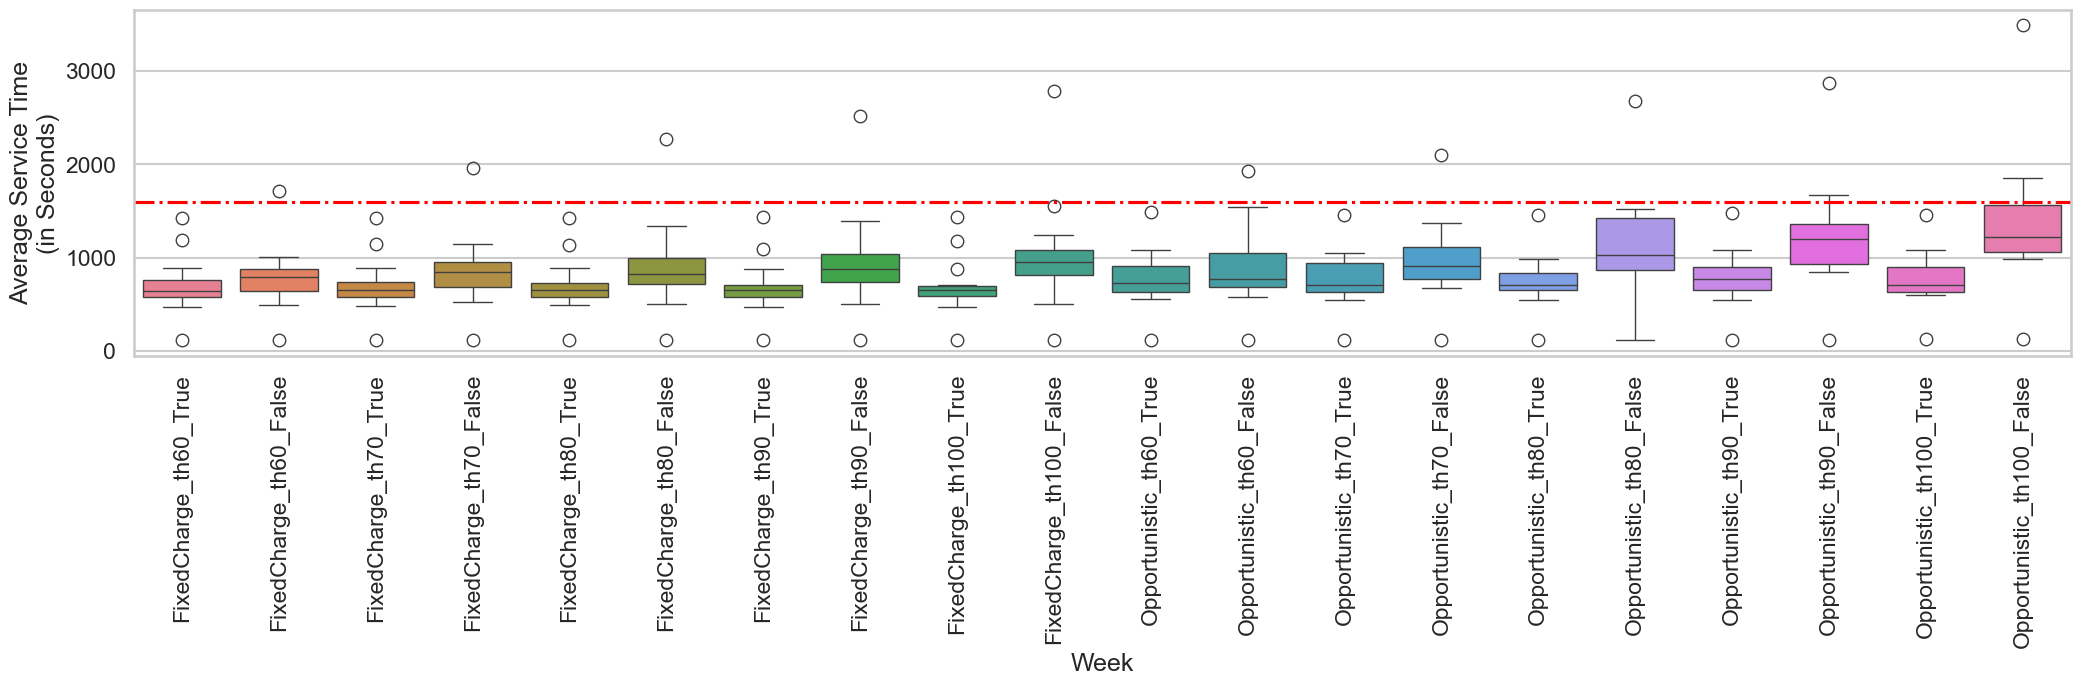

In [209]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
col_names = [th for th in col_names] # .split("th")[1]
col_names = ["OPP" if th == "opportunity+" else th for th in col_names]
_, ax = plt.subplots(figsize=(25, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='name', y='average_service_time', data=df_paper, hue="name")
ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Week")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(1600, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("Average Service Time\n(in Seconds)")
plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_per_week.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

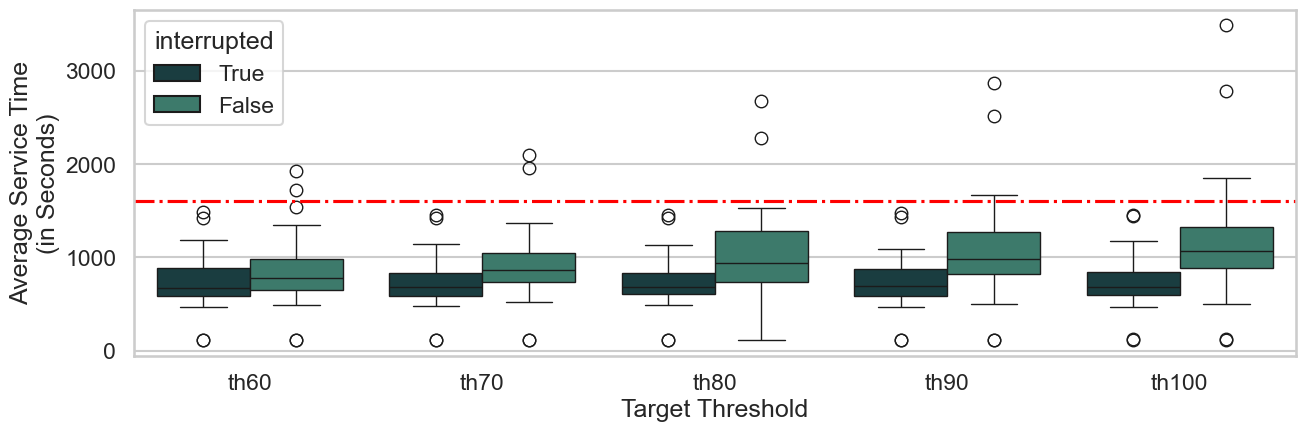

In [210]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(15, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='threshold', y='average_service_time', data=df_paper, hue="interrupted", palette=palette)
# ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Target Threshold")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(1600, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("Average Service Time\n(in Seconds)")
plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_vs_interrupt_per_week.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

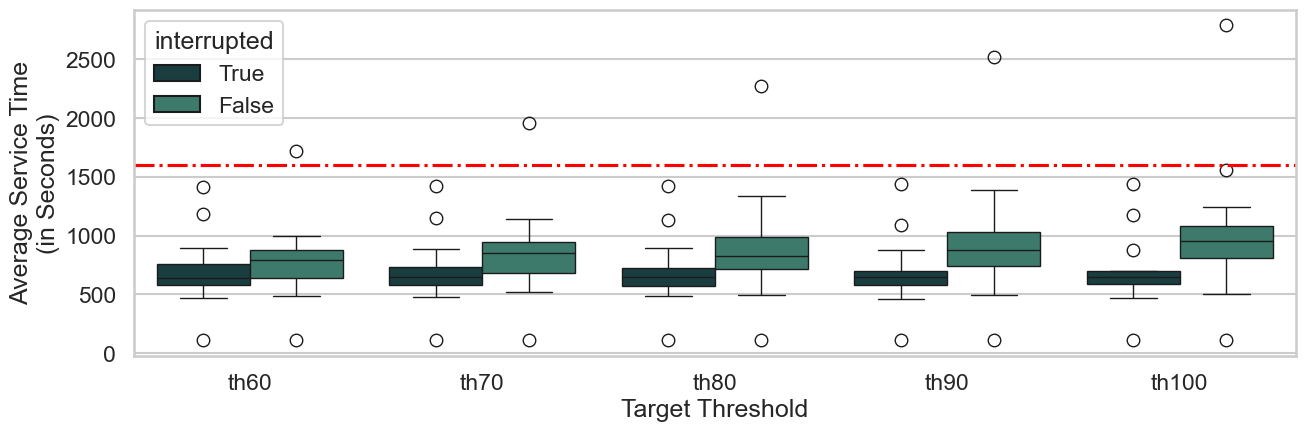

In [214]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(15, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='threshold', y='average_service_time', data=df_paper[df_paper["go_charging"]=="FixedCharge"], hue="interrupted", palette=palette)
# ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Target Threshold")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(1600, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("Average Service Time\n(in Seconds)")
plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_vs_interrupt_per_week.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

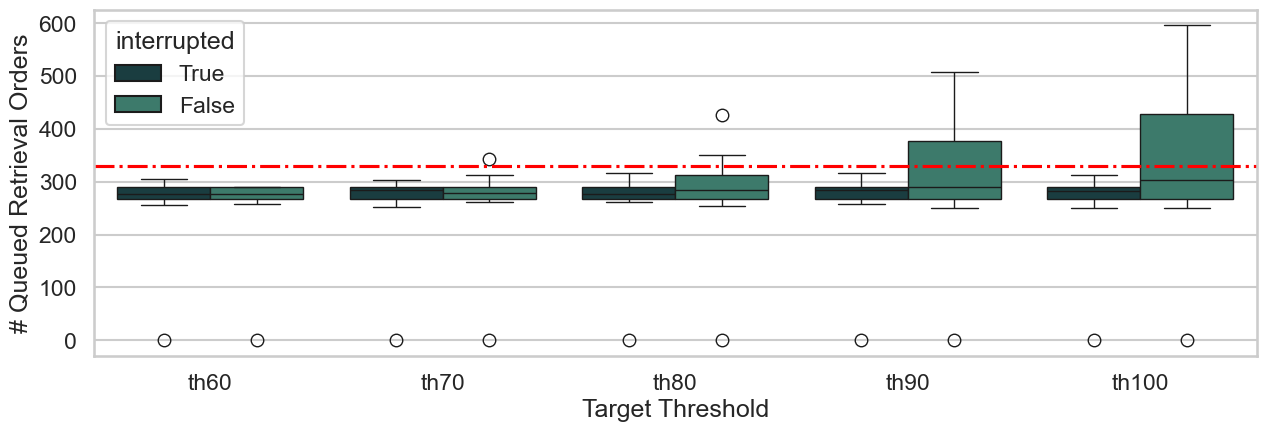

In [215]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(15, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='threshold', y='max_retrieval_buffer', data=df_paper[df_paper["go_charging"]=="FixedCharge"], hue="interrupted", palette=palette)
# ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Target Threshold")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(330, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("# Queued Retrieval Orders")
plt.savefig(f'{root_dir}/boxplot__queued_retrieval_thresholds_vs_interrupt_per_week.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

Text(0, 0.5, 'Average Service Time\n(in Seconds)')

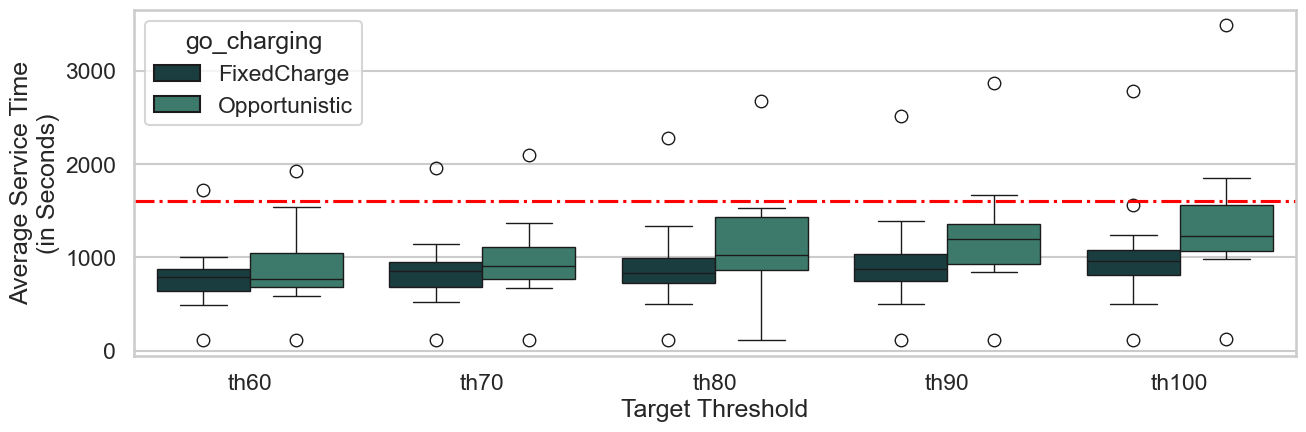

In [217]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(15, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='threshold', y='average_service_time', data=df_paper[df_paper["interrupted"]=="False"], hue="go_charging", palette=palette)
# ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Target Threshold")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(1600, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("Average Service Time\n(in Seconds)")
# plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_vs_interrupt_per_week.png', 
#                 dpi=200, bbox_inches='tight', pad_inches=0)

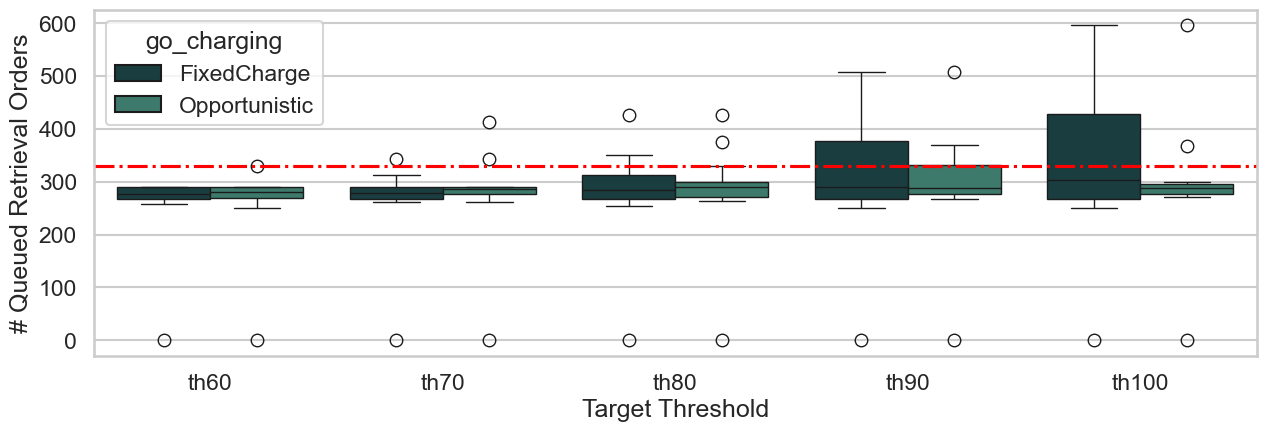

In [216]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(15, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='threshold', y='max_retrieval_buffer', data=df_paper[df_paper["interrupted"]=="False"], hue="go_charging", palette=palette)
# ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Target Threshold")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(330, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("# Queued Retrieval Orders")
# plt.savefig(f'{root_dir}/boxplot__queued_retrieval_thresholds_vs_interrupt_per_week.png', 
#                 dpi=200, bbox_inches='tight', pad_inches=0)

Text(0, 0.5, 'Average Service Time\n(in Seconds)')

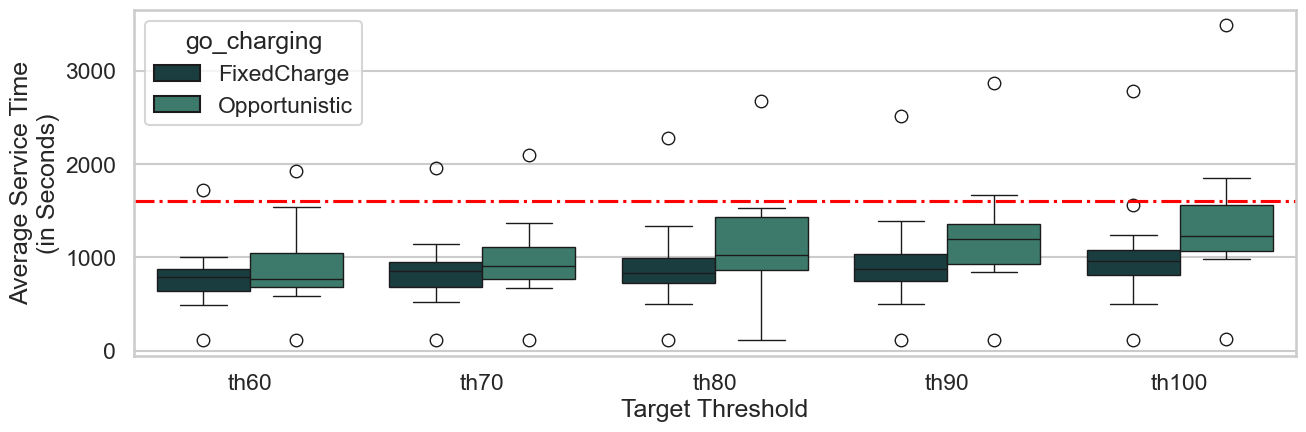

In [212]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(15, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='threshold', y='average_service_time', data=df_paper[df_paper["interrupted"]=="False"], hue="go_charging", palette=palette)
# ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Target Threshold")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(1600, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("Average Service Time\n(in Seconds)")
# plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_vs_interrupt_per_week.png', 
#                 dpi=200, bbox_inches='tight', pad_inches=0)

In [194]:
df_paper[df_paper["interrupted"]=="False"]

,total_distance,total_shift_distance,distance_retrieval_ave,utilization_time,makespan,cycle_time,entropy,average_service_time,throughput,max_delivery_buffer,...,max_agv_depleted,mean_agv_depleted,max_cs_queue,mean_cs_queue,index,name,go_charging,interrupted,threshold,week
2,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,0.005719,0,...,1,0.003356,1,0.001678,2,FixedCharge_th60_False,FixedCharge,False,th60,0
3,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,0.005719,0,...,1,0.003356,1,0.001678,3,Opportunistic_th60_False,Opportunistic,False,th60,0
6,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,0.005719,0,...,1,0.003356,1,0.001678,6,FixedCharge_th70_False,FixedCharge,False,th70,0
7,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,0.005719,0,...,1,0.003356,1,0.001678,7,Opportunistic_th70_False,Opportunistic,False,th70,0
10,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,0.005719,0,...,1,0.003356,1,0.001678,10,FixedCharge_th80_False,FixedCharge,False,th80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3456796.2,301618.8,177.077951,0.016146,7658292.9,4.795570e+06,0.669110,2247.935604,0.002459,16,...,31,5.055806,31,4.863537,11,Opportunistic_th80_False,Opportunistic,False,th80,13
16,3473441.8,299230.4,178.289658,0.016121,7658591.8,4.669860e+06,0.661070,2444.642958,0.002459,16,...,32,4.441937,31,4.270695,14,FixedCharge_th90_False,FixedCharge,False,th90,13
17,3473441.8,299230.4,178.289658,0.016121,7658591.8,4.669860e+06,0.661070,2444.642958,0.002459,16,...,32,4.441937,31,4.270695,15,Opportunistic_th90_False,Opportunistic,False,th90,13
18,3464713.2,300000.4,178.268269,0.016158,7658177.8,4.707207e+06,0.659048,2790.589852,0.002459,16,...,34,4.796049,34,4.639622,18,FixedCharge_th100_False,FixedCharge,False,th100,13


C:\Users\zm0714\AppData\Local\Temp\ipykernel_44060\1738395474.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='go_charging', y='average_service_time', data=df_paper, palette=palette)


Text(0, 0.5, 'Average Service Time\n(in Seconds)')

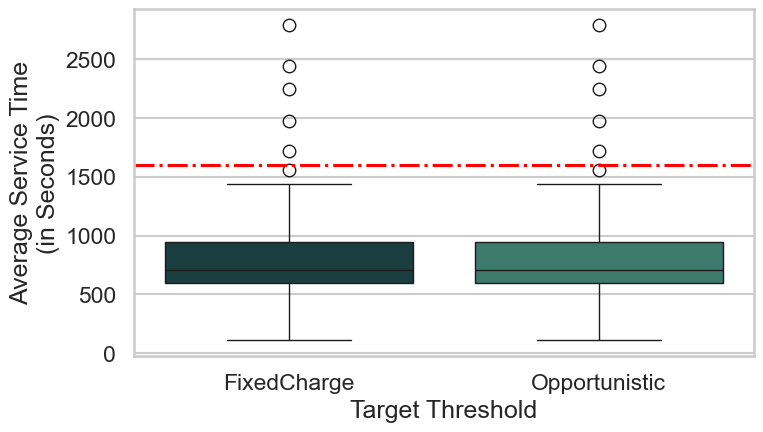

In [189]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='go_charging', y='average_service_time', data=df_paper, palette=palette)
# ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Target Threshold")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(1600, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("Average Service Time\n(in Seconds)")
# plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_per_week.png', 
#                 dpi=200, bbox_inches='tight', pad_inches=0)

Text(0, 0.5, 'Average Service Time\n(in Seconds)')

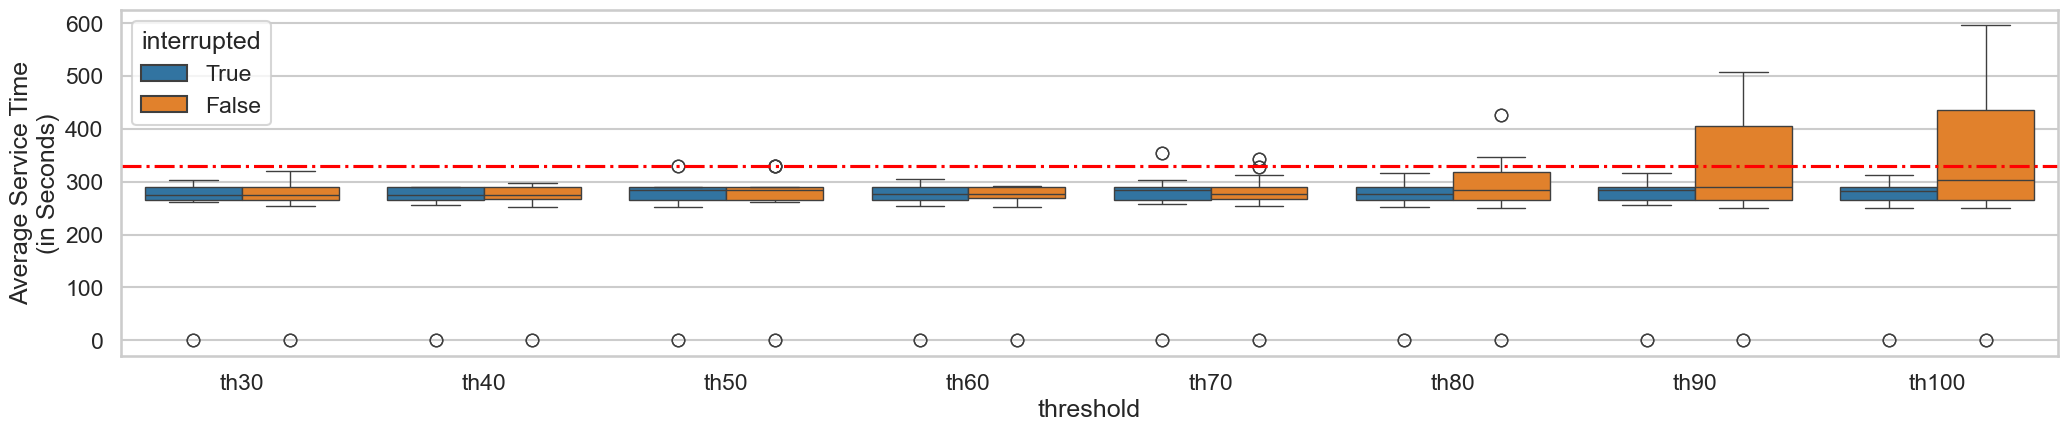

In [165]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
# col_names = [th for th in col_names] # .split("th")[1]
_, ax = plt.subplots(figsize=(25, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='threshold', y='max_retrieval_buffer', data=df_paper, hue="interrupted")
# ax.set_xticklabels(labels=col_names, rotation=90)
# ax.set_xlabel("Week")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(330, color='red', linestyle='dashdot', label='Limit')
ax.set_ylabel("Average Service Time\n(in Seconds)")
# plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_per_week.png', 
#                 dpi=200, bbox_inches='tight', pad_inches=0)

C:\Users\zm0714\AppData\Local\Temp\ipykernel_44060\2051935237.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=col_names, rotation=90)


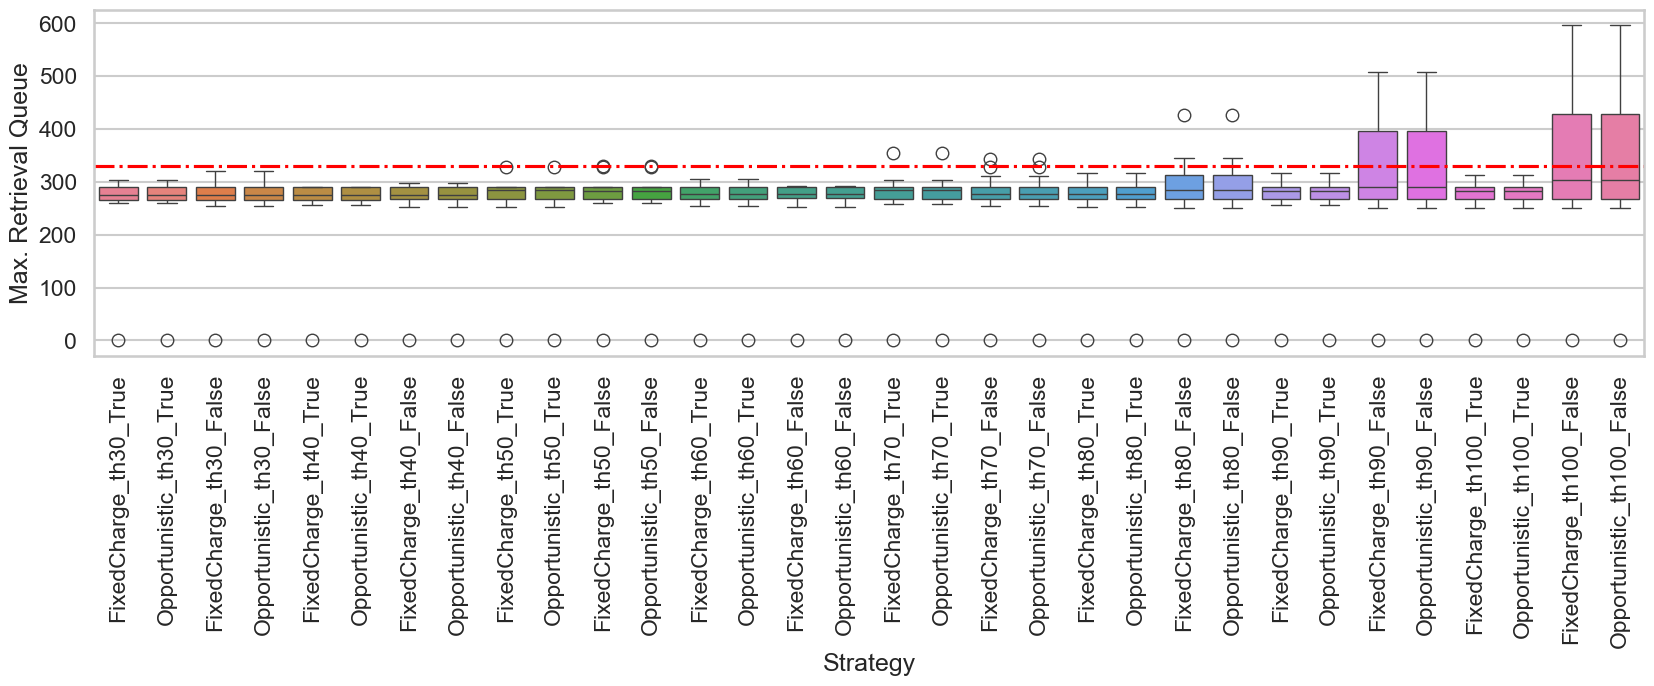

In [140]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
col_names = [th for th in col_names]
col_names = ["OPP" if th == "opportunity+" else th for th in col_names]
_, ax = plt.subplots(figsize=(20, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='name', y='max_retrieval_buffer', data=df_paper, hue="name")
ax.set_xticklabels(labels=col_names, rotation=90)
ax.set_xlabel("Strategy")
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.axhline(330, color='red', linestyle='dashdot', label='Limit') 
ax.set_ylabel("Max. Retrieval Queue")
plt.savefig(f'{root_dir}/boxplot__kpi__max_ret_buffer_per_week.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

In [362]:
df_paper[df_paper["name"]=="th50"]

,total_distance,total_shift_distance,distance_retrieval_ave,utilization_time,makespan,cycle_time,entropy,average_service_time,throughput,max_delivery_buffer,max_retrieval_buffer,mean_retrieval_buffer,max_agv_depleted,mean_agv_depleted,max_cs_queue,mean_cs_queue,index,name,week
2,1.140482e+05,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,0.005719,0,0,0.000000,1,0.003356,1,0.001678,2,th50,0
0,5.419190e+06,372957.2,169.922180,0.221091,763130.4,2.810189e+05,0.625391,504.517630,0.041528,6,277,19.422581,19,3.122842,18,2.806948,2,th50,1
3,6.322847e+06,444525.2,183.562837,0.145830,1369928.9,6.274805e+05,1.010468,784.622490,0.025264,8,272,27.447414,16,4.104450,15,3.741549,2,th50,2
0,6.838631e+06,420814.8,180.880225,0.104174,1975318.0,8.596851e+05,0.770803,774.817313,0.018799,9,290,27.472909,21,4.695724,19,4.300910,2,th50,3
0,6.809783e+06,480538.8,176.535138,0.083857,2576310.0,1.349455e+06,1.086632,747.600071,0.014353,8,290,23.636243,14,4.233923,14,3.857429,2,th50,4
2,6.577499e+06,466006.8,176.356022,0.066245,3192378.8,1.465949e+06,0.810743,904.865670,0.011486,14,277,29.899531,17,5.106660,17,4.703665,2,th50,5
5,6.537890e+06,385106.4,177.199926,0.049571,3801628.0,2.000924e+06,0.660566,525.807173,0.008746,7,254,18.771338,15,3.691789,15,3.334406,2,th50,6
1,6.071458e+06,371943.6,178.748552,0.041099,4379721.4,2.276797e+06,0.705866,619.953147,0.007410,7,290,20.286414,18,4.218162,18,3.857394,2,th50,7
6,5.389217e+06,341194.0,171.634683,0.032256,4971417.2,2.881597e+06,0.971682,684.510798,0.005653,9,261,25.460750,14,3.668600,14,3.313963,2,th50,8
6,5.650941e+06,403524.8,176.116649,0.032400,5572705.7,3.128303e+06,0.990169,1465.195497,0.005424,14,290,33.487115,20,5.073903,20,4.678157,2,th50,9


In [356]:
df_paper[df_paper["name"]=="thopportunity+"]

,total_distance,total_shift_distance,distance_retrieval_ave,utilization_time,makespan,cycle_time,entropy,average_service_time,throughput,max_delivery_buffer,max_retrieval_buffer,mean_retrieval_buffer,max_agv_depleted,mean_agv_depleted,max_cs_queue,mean_cs_queue,index,name,week
9,2.012066e+05,0.0,0.000000,0.016635,104209.8,0.000000e+00,0.136854,116.346644,0.005719,0,0,0.000000,11,6.850671,7,2.236577,9,thopportunity+,0
5,6.384399e+06,360256.4,177.612853,0.225203,763124.8,2.724297e+05,0.659405,745.150557,0.041528,7,279,27.155659,38,7.636932,38,6.117825,9,thopportunity+,1
7,6.962901e+06,432980.8,190.280823,0.147435,1369936.6,6.380371e+05,0.993165,1150.345025,0.025264,13,276,35.414418,38,7.585929,38,6.471482,9,thopportunity+,2
5,7.631050e+06,408822.4,187.498792,0.105473,1975311.0,8.734991e+05,0.750383,881.967749,0.018799,12,314,31.378090,37,8.195050,35,6.956590,9,thopportunity+,3
6,7.453552e+06,476736.4,182.454369,0.085306,2576309.3,1.308234e+06,1.089290,973.186803,0.014353,8,290,31.975039,35,8.270323,34,6.941235,9,thopportunity+,4
3,7.120771e+06,471007.6,183.602621,0.067680,3192383.7,1.478573e+06,0.827411,990.882396,0.011486,14,277,34.006600,37,7.478946,37,6.229492,9,thopportunity+,5
8,7.260535e+06,378823.2,190.262092,0.050919,3801629.4,2.090821e+06,0.680003,663.456406,0.008746,7,278,25.457444,36,9.297985,36,7.653383,9,thopportunity+,6
6,6.836547e+06,381329.2,185.308323,0.042293,4379719.3,2.254152e+06,0.739066,861.278665,0.007410,8,290,28.467384,38,7.635935,38,6.131267,9,thopportunity+,7
3,6.128373e+06,345461.2,182.157984,0.033445,4971408.8,2.879159e+06,0.980603,636.146872,0.005653,9,267,24.492563,37,8.433777,36,6.358160,9,thopportunity+,8
3,6.154553e+06,401970.8,184.044134,0.032800,5573654.9,2.974073e+06,0.957391,1146.667207,0.005424,14,290,32.217043,38,7.492474,38,5.960766,9,thopportunity+,9


In [ ]:
col_names = list(df_paper['name'].unique())
# col_names = [name.strip("Avg. Service Time") for name in col_names]
# col_names = [int(col_name) for col_name in col_names]
# col_names.sort()
col_names = [th.split("th")[1] for th in col_names]
col_names = ["OPP" if th == "opportunity+" else th for th in col_names]
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle(pal)
ax = sns.boxplot(x='name', y='average_service_time', data=df_paper, hue="name")
ax.set_xticklabels(labels=col_names)
ax.set_xlabel("Week")
# ax2 = plt.twinx()
# sns.lineplot(data=df_fill_lvl.reset_index(), x='partition', y="fill_level", color="red", ax=ax2)
# ax2.set_ylabel("Fill Level")
ax.set_ylabel("Average Service Time\n(in Seconds)")
plt.savefig(f'{root_dir}/boxplot__kpi__average_service_time_thresholds_per_week.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)

In [341]:
df_paper[df_paper["name"]=="th70"]["max_retrieval_buffer"].max()

344

In [253]:
for week, week_data in pd.concat(flattened_list).groupby("index"):
    print(week_data)

   total_distance  total_shift_distance  distance_retrieval_ave  \
0    1.140482e+05                   0.0                0.000000   
3    5.672436e+06              367668.0              174.767874   
8    6.617501e+06              435593.2              188.650722   
8    7.095360e+06              411796.0              183.328883   
8    7.118384e+06              486698.8              180.783951   
8    6.906457e+06              460289.2              183.275214   
7    6.800058e+06              384423.2              181.408904   
4    6.306094e+06              371492.8              183.066318   
8    5.587214e+06              338842.0              174.956941   
8    5.913481e+06              402984.4              180.891435   
4    6.494924e+06              440753.6              195.857928   
6    5.813023e+06              386383.2              178.726530   
6    5.683766e+06              425110.0              182.220931   
3    3.598974e+06              299272.4              179.89425

In [228]:
from copy import deepcopy

baseline = "th100"
subset_max = []
subset_min = ["Mean"]
result_m_s = result_m_s.sort_values(by="Mean")
res_paper_df = deepcopy(result_m_s)
res_table_paper = deepcopy(result_m_s)
if baseline:
    for col in result_m_s.columns:
        print(col)
        # percent = res_paper_df[col] / res_paper_df[col][baseline] * 100 - 100
        # if col in subset_max:
        #     best_h = percent[percent == percent.max()].index
        # else:
        #     best_h = percent[percent == percent.min()].index
        # percent_str = percent.map('{:.2f}'.format)
        res_table_paper[col] = ('\makecell[c]{' 
                                + (res_paper_df[col].map('{:.2f}'.format)))
        # 
        # res_table_paper.loc[best_h, col] = ('\makecell[c]{\textbf{' 
        #                         + '{:.2f}'.format(res_paper_df.loc[best_h, col][0])
        #                            + "}\\(\textbf{" + percent_str.loc[best_h] + "\%})}")
#         if best_h[0] != baseline:
#             res_table_paper.loc[baseline, col] = '{:.2f}'.format(res_paper_df.loc[baseline, col])
#         else:
#             res_table_paper.loc[baseline, col] = '\textbf{' + '{:.2f}'.format(res_paper_df.loc[baseline, col]) + '}'
# 
latex_string = res_table_paper.to_latex(bold_rows=True, multicolumn=True,escape=False)
print(type(latex_string), '\n', latex_string)

Mean
<class 'str'> 
 \begin{tabular}{ll}
\toprule
 & Mean \\
Strategy &  \\
\midrule
\textbf{239.823539} & \makecell[c]{637.99 \\
\textbf{381.365307} & \makecell[c]{779.25 \\
\textbf{381.648481} & \makecell[c]{787.30 \\
\textbf{381.132571} & \makecell[c]{824.89 \\
\textbf{432.447276} & \makecell[c]{830.03 \\
\textbf{478.510441} & \makecell[c]{885.05 \\
\textbf{556.869149} & \makecell[c]{953.19 \\
\textbf{469.661624} & \makecell[c]{1019.44 \\
\textbf{611.508443} & \makecell[c]{1029.58 \\
\bottomrule
\end{tabular}



<Axes: xlabel='average_service_time', ylabel='mean_agv_depleted'>

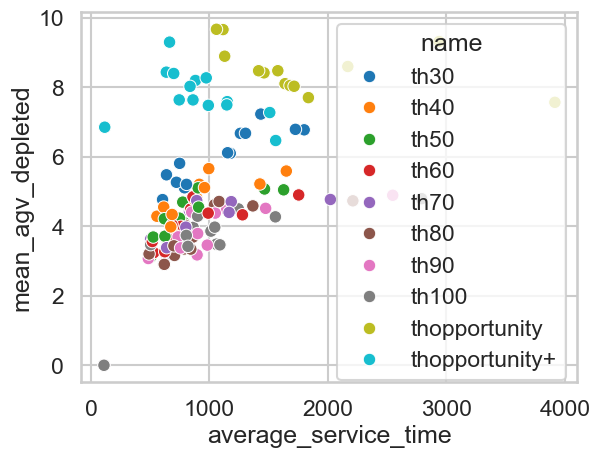

In [223]:
# for i in range(14):
sns.scatterplot(x="average_service_time", y="mean_agv_depleted", data=pd.concat(flattened_list), hue="name")

In [136]:
res_paper_df

,Strategy,Min,Min Strat,Max,Max Strat,PPO
0,0,109.94,30,116.35,opportunity,120.18000
1,1,504.52,50,1460.82,opportunity,558.63790
2,2,747.28,60,2167.87,opportunity,698.90720
3,3,774.82,50,1638.13,opportunity,609.36960
4,4,747.6,50,1680.29,opportunity,609.39026
5,5,861.08,60,1714.84,opportunity,663.84960
6,6,484.42,90,1114.74,opportunity,499.13748
7,7,614.31,40,1577.24,opportunity,505.90472
8,8,612.8,90,1059.32,opportunity,589.59580
9,9,1045.09,100,1835.39,opportunity,961.61444


In [47]:
def trim_duplicate_signal_values(ts_df, column, verbose=False, samples=10000):
    ts_to_trim = ts_df[[column]].round(decimals=2)
    if verbose:
        print(f'Number of values in {column} before '
              f'trimming: {ts_to_trim.size}')
    ts_to_trim_shift_r = ts_to_trim.shift(1)
    ts_to_trim_shift_l = ts_to_trim.shift(-1)
    ts_trimmed = ts_to_trim[
        (ts_to_trim[column] != ts_to_trim_shift_r[column]) |
        (ts_to_trim[column] != ts_to_trim_shift_l[column])]
    # display(df_stufe_min_data)
    if verbose:
        print(f'Number of values in {column} after '
              f'trimming: {ts_trimmed.size}')
        print(f'Number of values after uniform sampling: {samples}')
    adjusted_n_samples = min(samples, ts_trimmed.shape[0])
    return ts_trimmed[column].sample(adjusted_n_samples)

def get_x_values(ts_df, index, column):
    return ts_df[column].loc[list(index)]

In [48]:
dfs_d[4][0].columns

Index(['total_distance', 'average_distance', 'travel_time_retrieval_ave',
       'distance_retrieval_ave', 'total_shift_distance', 'utilization_time',
       'n_queued_retrieval_orders', 'n_queued_delivery_orders',
       'n_finished_orders', 'kpi__throughput', 'kpi__makespan',
       'kpi__average_service_time', 'kpi__cycle_time', 'runtime',
       'n_free_agvs', 'n_pallet_shifts', 'n_steps', 'n_decision_steps',
       'fill_level', 'entropy', 'n_queued_charging_events',
       'avg_battery_level', 'n_agv_depleted', 'n_agv_not_depleted',
       'n_charging_events', 'strategy_name', 'n_zones'],
      dtype='object')

In [49]:
len(dfs_d[0])

2

In [50]:
dfs_d[2][1]

,total_distance,average_distance,travel_time_retrieval_ave,distance_retrieval_ave,total_shift_distance,utilization_time,n_queued_retrieval_orders,n_queued_delivery_orders,n_finished_orders,kpi__throughput,...,n_decision_steps,fill_level,entropy,n_queued_charging_events,avg_battery_level,n_agv_depleted,n_agv_not_depleted,n_charging_events,strategy_name,n_zones
0,2.033200e+03,54.951351,60.705556,90.311111,5.6,0.000003,258,4,1,0.000001,...,40,0.849221,0.132610,0,99.816213,0,40,0,,3
1,2.662000e+03,63.380952,82.495000,121.460000,11.2,0.000007,257,4,2,0.000003,...,42,0.849170,0.133745,0,99.751149,0,40,0,,3
2,2.737800e+03,63.669767,86.695000,127.460000,14.0,0.000012,256,4,3,0.000004,...,44,0.849118,0.133745,0,99.737126,0,40,0,,3
3,2.808000e+03,63.818182,87.745000,129.060000,25.2,0.000018,255,4,4,0.000005,...,46,0.849067,0.133745,0,99.724225,0,40,0,,3
4,2.864200e+03,63.648889,86.415000,127.220000,33.6,0.000023,254,4,5,0.000006,...,48,0.849016,0.133745,0,99.713942,0,40,0,,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34605,6.961629e+06,84.792439,129.064189,190.280823,432980.8,0.147469,0,0,34606,0.025268,...,75363,0.849375,0.993004,0,92.767228,1,39,6152,,3
34606,6.961960e+06,84.791309,129.064189,190.280823,432980.8,0.147460,0,0,34607,0.025267,...,75368,0.849426,0.993009,0,92.796955,0,40,6154,,3
34607,6.962304e+06,84.792400,129.064189,190.280823,432980.8,0.147452,0,0,34608,0.025266,...,75369,0.849477,0.993182,0,92.753579,1,39,6154,,3
34608,6.962626e+06,84.792189,129.064189,190.280823,432980.8,0.147443,0,0,34609,0.025265,...,75373,0.849528,0.993178,0,92.783868,0,40,6156,,3


CPU times: total: 1.39 s
Wall time: 2.09 s


<Axes: xlabel='Time (in Seconds)', ylabel='Avg Battery Level'>

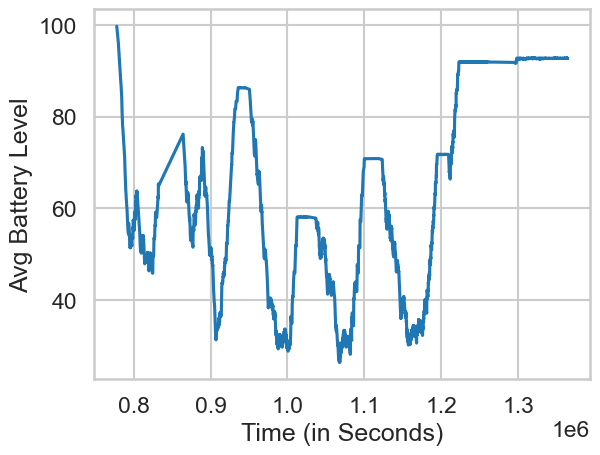

In [54]:
%%time

def plot_indicator(df, column_name, x_axis_col='kpi__makespan', ax=None, 
                   n_samples=10000, color=None, label='', alpha=1):
    trimmed_signal = trim_duplicate_signal_values(
        df, column_name, False, n_samples)
    time = get_x_values(df, trimmed_signal.index, x_axis_col)
    ax_modified = sns.lineplot(
        x=time, y=trimmed_signal.values, ax=ax, color=color, label=label, 
        alpha=alpha)
    ax_modified.set_ylabel(
        ' '.join([s.capitalize() for s in column_name.split('_')]))
    ax_modified.set_xlabel('Time (in Seconds)')
    return ax_modified

plot_indicator(dfs_d[2][1], 'avg_battery_level')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


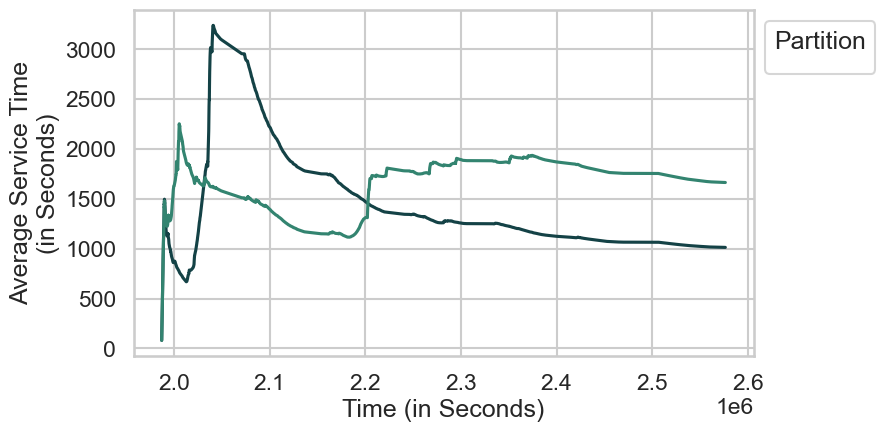

In [55]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
for df in dfs_d[4]:
    ax = sns.lineplot(ax=ax, x='kpi__makespan', y='kpi__average_service_time',
                      label=df.name, color=next(palette), data=df)

    ax.legend(title='Partition')
    # ax.set_xlim((-5000, xlim + 20000))
    ax.set_xlabel('Time (in Seconds)')
    ax.set_ylabel('Average Service Time\n(in Seconds)')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [160]:
dfs_d_actions[2]

[       Unnamed: 0   Step  Action  kpi__makespan  kpi__average_service_time  \
 0               0      1       0   7.777288e+05                 113.400000   
 1               0      2       0   7.777592e+05                 128.666667   
 2               0      3       0   7.777625e+05                 137.125000   
 3               0      4       0   7.777663e+05                 142.960000   
 4               0      5       0   7.778229e+05                 156.283333   
 ...           ...    ...     ...            ...                        ...   
 34605           0  34606     100   1.369635e+06                 697.732746   
 34606           0  34607     100   1.369741e+06                 697.716324   
 34607           0  34608     100   1.369833e+06                 697.699680   
 34608           0  34609     100   1.369938e+06                 697.683220   
 34609           0  34610     100   1.370110e+06                 697.683220   
 
        avg_battery_level  n_queued_charging_event

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


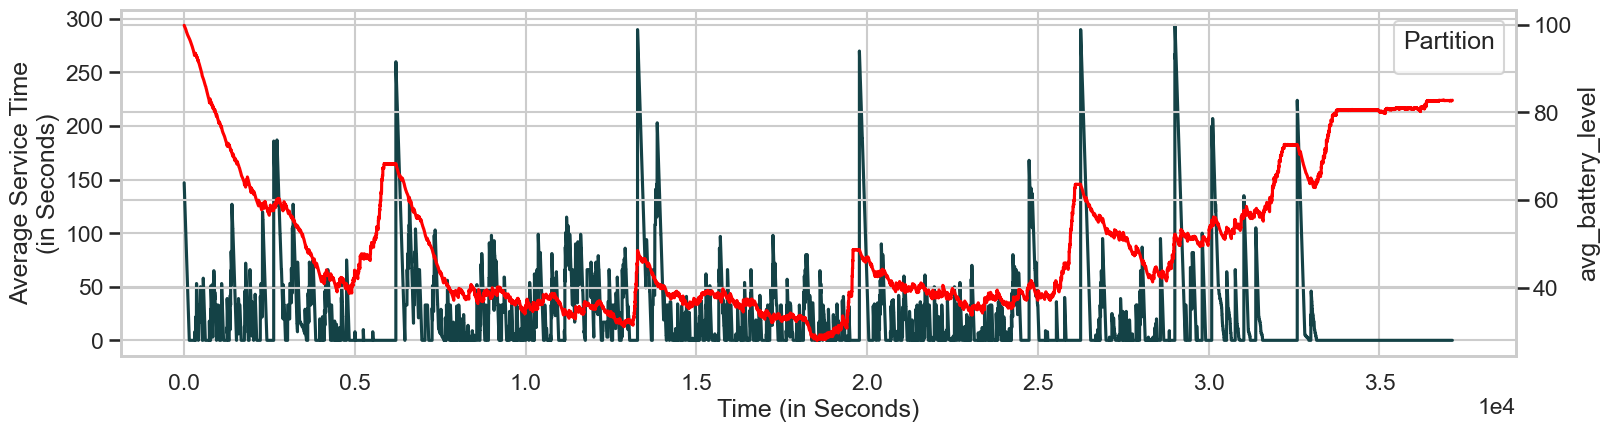

In [172]:
_, ax = plt.subplots(figsize=(18, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
# for df in dfs_d_actions[0]:
ax = sns.lineplot(ax=ax, x='Step', y='n_queued_retrieval_orders', 
                    label="", color=next(palette), data=dfs_d_actions[3][0])
ax2 = plt.twinx()
sns.lineplot(data=dfs_d_actions[3][0], x='Step', y='avg_battery_level', color="red", ax=ax2)
ax.legend(title='Partition')
#ax.set_xlim((-5000, xlim + 20000))
ax.set_xlabel('Time (in Seconds)')
ax.set_ylabel('Average Service Time\n(in Seconds)')
plt.savefig(f'{root_dir}/violinplot_dist_charging_actions.png', 
                    dpi=200, bbox_inches='tight', pad_inches=0)

In [371]:
# Initialize lists to store the results
actions = pd.DataFrame()
ppo_results = {i: 0 for i in range(n_partitions)}
# Loop through each partition to retrieve and compute statistics
for i in range(n_partitions):
    # Construct the key for the specific partition
    key_action = f"logs/Evaluation/{i}/Action"
    key_ret_orders = f"logs/Evaluation/{i}/N_Retrieval_Orders"

    # Retrieve history for the current partition
    action_df = run.history(keys=[key_action])
    ret_orders_df = run.history(keys=[key_ret_orders])
    if key_action in action_df:
        action_df.rename(columns={key_action: "Action"}, inplace=True)
        ret_orders_df.rename(columns={key_ret_orders: "queued_retrieval_orders"}, inplace=True)
        action_df["Week"] = i
        action_df["queued_retrieval_orders"] = ret_orders_df["queued_retrieval_orders"]
        ret_orders_df["Week"] = i
        
        actions = pd.concat([actions, action_df])

    else:
        print(f"Data for Partition {i} not found.")


In [374]:
actions[actions["Week"] == 10]["queued_retrieval_orders"].max()

201

In [372]:
actions

,_step,Action,Week,queued_retrieval_orders
0,2012639.0,8,0,0
1,2012646.0,8,0,0
2,2012653.0,8,0,0
3,2012660.0,8,0,0
4,2012681.0,8,0,0
...,...,...,...,...
495,4894762.0,0,13,66
496,4895007.0,0,13,61
497,4895168.0,0,13,51
498,4895364.0,8,13,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Average Service Time\n(in Seconds)')

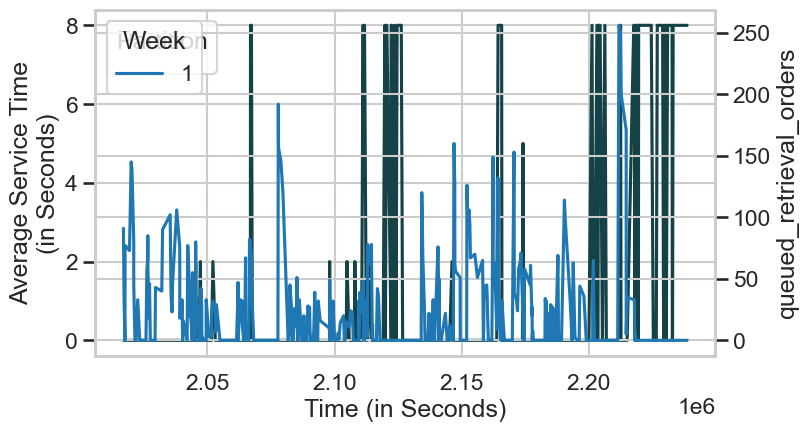

In [149]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
week = 2
df = actions[actions["Week"] == 1]
palette = cycle(pal)
ax = sns.lineplot(ax=ax, x='_step', y='Action', 
                    label="", color=next(palette), data=df)
ax2 = plt.twinx()
sns.lineplot(data=df, x='_step', y='queued_retrieval_orders', color="red", ax=ax2, hue="Week")
ax.legend(title='Partition')
#ax.set_xlim((-5000, xlim + 20000))
ax.set_xlabel('Time (in Seconds)')
ax.set_ylabel('Average Service Time\n(in Seconds)')

In [174]:
df_result_actions = pd.DataFrame()
for idx_df in partitions: 
    # for idx_m, model in enumerate(["SAC", "DQN"]):
    df = dfs_d_actions[idx_df][0]
    df["Model"] = "PPO"
    df["partition"] = idx_df
    df_result_actions = pd.concat([df_result_actions, df])

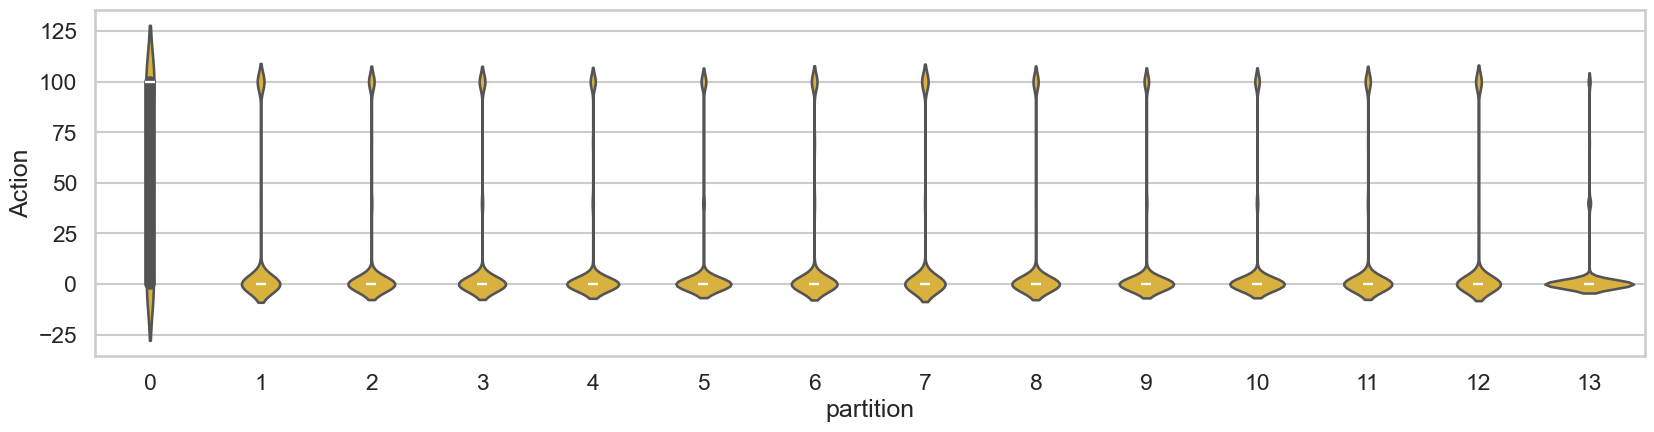

In [175]:
_, ax = plt.subplots(figsize=(20, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle([pal[0], pal[3]])
ax = sns.violinplot(ax=ax, x="partition", y="Action", data=df_result_actions, color=pal[3])

In [237]:
df_result_actions

,Unnamed: 0,Step,Action,kpi__makespan,kpi__average_service_time,avg_battery_level,n_queued_charging_events,n_queued_retrieval_orders,n_depleted_agvs,Model,partition
0,0,1,100,8.656760e+04,99.650000,99.959148,0,0,1,PPO,0
1,0,2,100,8.658730e+04,99.533333,99.942134,0,0,2,PPO,0
2,0,3,100,8.661870e+04,99.825000,99.921007,1,0,3,PPO,0
3,0,4,100,8.664110e+04,101.680000,99.919324,0,0,3,PPO,0
4,0,5,100,8.664570e+04,102.683333,99.899225,0,0,4,PPO,0
...,...,...,...,...,...,...,...,...,...,...,...
18828,0,18829,100,7.658333e+06,1201.814780,52.276349,4,0,5,PPO,13
18829,0,18830,0,7.658364e+06,1201.812768,52.241293,5,0,5,PPO,13
18830,0,18831,0,7.658378e+06,1201.811504,52.219418,5,0,5,PPO,13
18831,0,18832,0,7.658385e+06,1201.810600,52.204834,5,0,5,PPO,13


In [274]:
df_result_actions[df_result_actions["partition"]==2]["n_depleted_agvs"].max()

14

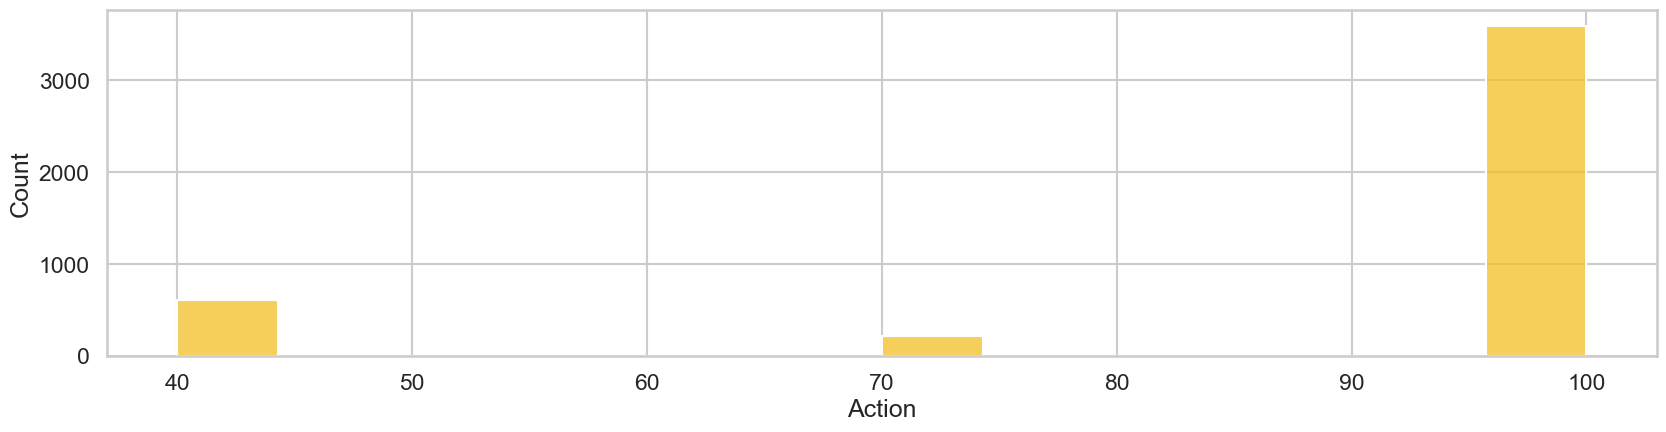

In [177]:
_, ax = plt.subplots(figsize=(20, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle([pal[0], pal[3]])
ax = sns.histplot(ax=ax, x="Action", data=df_result_actions[(df_result_actions["partition"] == 2) & (df_result_actions["Action"]!= 0)], color=pal[3], )

plt.savefig(f'{root_dir}/violinplot_dist_charging_actions.png', 
                    dpi=200, bbox_inches='tight', pad_inches=0)

In [58]:
threshold_columns = [30, 40, 50, 60, 70, 80]  # Update based on actual threshold columns
heatmap_df = result_df.set_index("Strategy")[threshold_columns]
heatmap_df = heatmap_df.astype(float)
heatmap_df = heatmap_df.div(heatmap_df.max(axis=1), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Average Service Time Across Thresholds and Strategies")
plt.ylabel("Strategy")
plt.xlabel("Threshold")

KeyError: "None of [Index([30, 40, 50, 60, 70, 80], dtype='int32')] are in the [columns]"

In [ ]:
thresholds = result_df.columns[2:-1]  # select only threshold columns
plt.figure(figsize=(10, 6))

for i, row in result_df.iterrows():
    plt.scatter(thresholds, row[2:-1], label=f'Week {row["Strategy"]}', s=60)  # size can be adjusted

plt.xlabel("Threshold")
plt.ylabel("Performance Value")
plt.title("Performance of Strategies Across Thresholds")
plt.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 10), constrained_layout=True)
axs = axs.flatten()

for i, (index, row) in enumerate(result_df.iterrows()):
    axs[i].scatter(thresholds, row[2:-1], color='b', s=70)
    axs[i].set_title(f'Strategy {row["Strategy"]}')
    axs[i].set_xlabel("Threshold")
    axs[i].set_ylabel("Performance")

plt.suptitle("Performance of Strategies Across Thresholds (Individual Panels)")
plt.show()

In [ ]:
result_df = result_df.astype(float)

In [ ]:
dfs_d[4][4]

In [ ]:
result_df.describe()

# Orders analysis

In [ ]:
import json

orders = json.load(open("../1_environment/slapstack/slapstack/use_cases/wepastacks/2_orders.json")) 
initial_fill = json.load(open("../1_environment/slapstack/slapstack/use_cases/wepastacks/3_initial_fill_lvl.json"))

In [ ]:
order_columns = ['type', 'sku', 'time', 'dock', 'batch', 'week']
order_df = pd.DataFrame(orders, columns=order_columns)

In [ ]:
# Sort the orders by time
order_df = order_df.sort_values(by='time').reset_index(drop=True)

# Calculate the time difference between consecutive orders
order_df['time_diff'] = order_df['time'].diff()

# Define a threshold for breaks (e.g., 1200 seconds for a 20-minute break)
threshold = 1200

# Identify breaks
breaks = order_df[order_df['time_diff'] > threshold]

# Display the breaks
print(breaks[['time', 'time_diff']])

In [ ]:
# Group orders by week and then by day within each week
order_data_by_day = {}
for order in orders:
    week = order[-1]  # Assuming week is the last item in the order tuple
    time = order[2]  # Assuming time is the second-to-last item in the order tuple
    day = time // 86400  # Calculate the day within the week

    if day not in order_data_by_day:
        order_data_by_day[day] = []
    
    order_data_by_day[day].append(order)


In [ ]:
len(order_data_by_day[5])

In [ ]:
def process_orders_by_week(orders, initial_fill):
    # Create a DataFrame from the orders
    order_columns = ['type', 'sku', 'time', 'dock', 'batch', 'week']
    order_df = pd.DataFrame(orders, columns=order_columns)
    order_df['day'] = order_df['time'] // (24 * 3600)
    
    # Initialize the fill levels from the initial fill data
    fill_levels = initial_fill.copy()

    # Store fill levels at the beginning of each week
    weekly_fill_levels = {}

    # Process orders week by week
    for week in sorted(order_df['week'].unique()):
        # Get orders for the current week
        weekly_orders = order_df[order_df['week'] == week]
        
        # Store the fill level at the beginning of the week
        weekly_fill_levels[week] = fill_levels.copy()
        
        # Process each order for the current week
        for _, order in weekly_orders.iterrows():
            order_type, sku = order['type'], str(order['sku'])
            
            # For delivery, increase the stock of the SKU
            if order_type == "delivery":
                fill_levels[sku] = fill_levels.get(sku, 0) + 1
            # For retrieval, decrease the stock of the SKU
            elif order_type == "retrieval":
                fill_levels[sku] = fill_levels.get(sku, 0) - 1

    return weekly_fill_levels, order_df

# Process the orders and calculate weekly fill levels
weekly_fill_levels, order_df = process_orders_by_week(orders, initial_fill)

# Print the fill levels at the beginning of each week
# for week, fill in weekly_fill_levels.items():
#     print(f"Week {week}: Fill levels: {fill}")

In [ ]:
def visualize_hourly_stock_movements(weekly_fill_levels, order_df, week=1):
    # Filter the orders for the given week and get the unique hours within this week
    first_week_orders = order_df[order_df['week'] == week]
    first_week_orders['hour'] = order_df['time'] // 3600  # Convert time to hours
    hours_in_week = sorted(first_week_orders['hour'].unique())

    # Initialize fill levels for aggregation at the start of the week
    fill_levels_at_start = weekly_fill_levels[week].copy()

    # Store the hourly changes in stock
    hourly_delivery_movements = []
    hourly_retrieval_movements = []
    
    # Process each hour within the week
    for hour in hours_in_week:
        hour_orders = first_week_orders[first_week_orders['hour'] == hour]

        # Track delivery and retrieval counts for the hour
        hourly_deliveries = 0
        hourly_retrievals = 0

        # Process each order within the hour
        for _, order in hour_orders.iterrows():
            order_type, sku = order['type'], str(order['sku'])
            if order_type == "delivery":
                hourly_deliveries += 1
                fill_levels_at_start[sku] = fill_levels_at_start.get(sku, 0) + 1
            elif order_type == "retrieval":
                hourly_retrievals += 1
                fill_levels_at_start[sku] = fill_levels_at_start.get(sku, 0) - 1

        # Append the hourly movements (deliveries and retrievals)
        hourly_delivery_movements.append(hourly_deliveries)
        hourly_retrieval_movements.append(hourly_retrievals)
    
    # Plot the hourly stock movements (deliveries and retrievals)
    plt.figure(figsize=(14, 6))
    plt.plot(hours_in_week, hourly_delivery_movements, label="Hourly Deliveries", color='g', marker='o')
    plt.plot(hours_in_week, hourly_retrieval_movements, label="Hourly Retrievals", color='r', marker='o')

    plt.title("Hourly Stock Movements (Deliveries and Retrievals) - First Week")
    plt.xlabel("Hour")
    plt.ylabel("Number of Movements")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

In [ ]:
visualize_hourly_stock_movements(weekly_fill_levels, order_df, week=4)

In [ ]:
weekly_summary = df_daily_fill.groupby('week').agg(
    avg_fill_level=('fill_level', 'mean'),   # Average fill level for the week
    total_orders=('net_change', 'count')     # Total number of orders (daily count sums to weekly total)
).reset_index()

# Step 2: Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average fill level on the left y-axis
ax1.set_xlabel('Week')
ax1.set_ylabel('Average Fill Level (%)', color='blue')
ax1.plot(weekly_summary['week'], weekly_summary['avg_fill_level'] * 100, color='blue', marker='o', label='Avg Fill Level')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create a second y-axis for the total number of orders
ax2 = ax1.twinx()
ax2.set_ylabel('Total Orders', color='purple')
ax2.bar(weekly_summary['week'], weekly_summary['total_orders'], color='purple', alpha=0.6, label='Total Orders')
ax2.tick_params(axis='y', labelcolor='purple')

# Add titles and legends
plt.title("Weekly Average Fill Level and Number of Orders")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
for df in dfs_d_actions[13]:
    ax = sns.lineplot(ax=ax, x='kpi__makespan', y='Action', 
                        label="DQN", color=next(palette), data=df)
    ax2 = plt.twinx()
    sns.lineplot(data=dfs_d[13][0], x='kpi__makespan', y='n_queued_retrieval_orders', color="red", ax=ax2)
    ax.legend(title='Partition')
    #ax.set_xlim((-5000, xlim + 20000))
    ax.set_xlabel('Time (in Seconds)')
    ax.set_ylabel('Average Service Time\n(in Seconds)')

In [ ]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
for df in dfs_d_actions[4]:
    ax = sns.lineplot(ax=ax, x='kpi__makespan', y='Action', 
                        label="DQN", color=next(palette), data=df)
    ax2 = plt.twinx()
    sns.scatterplot(data=dfs_d[4][0], x='Action', y='n_queued_retrieval_orders', color="red", ax=ax2)
    ax.legend(title='Partition')
    #ax.set_xlim((-5000, xlim + 20000))
    ax.set_xlabel('Time (in Seconds)')
    ax.set_ylabel('Average Service Time\n(in Seconds)')

In [ ]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
sns.scatterplot(data=dfs_d_actions[13][0], x='Action', y='n_queued_retrieval_orders', color="red")
ax.legend(title='Partition')
#ax.set_xlim((-5000, xlim + 20000))
ax.set_xlabel('Action')
ax.set_ylabel('# Retrieval Orders')

In [ ]:
df_result_actions = pd.DataFrame()
for idx_df in partitions: 
    for idx_m, model in enumerate(["PPO"]):
        df = dfs_d_actions[idx_df][idx_m]
        df["Model"] = model
        df["partition"] = idx_df
        df_result_actions = pd.concat([df_result_actions, df])

In [ ]:
dfs_d_actions[0][0]["Action"].unique()

In [ ]:
_, ax = plt.subplots(figsize=(20, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle([pal[0], pal[3]])
ax = sns.violinplot(ax=ax, x="partition", y="Action", data=df_result_actions[df_result_actions["Model"]=="PPO"], color=pal[3])

plt.savefig(f'{root_dir}/violinplot_dist_charging_actions_PPO.png', 
                    dpi=200, bbox_inches='tight', pad_inches=0)

In [ ]:
for pt in range(14):
    print(dfs_d_actions[pt][0]["Action"].unique())